# **SCI 111 - Zomato Recommendation - Data Analysis**

## **Authors of this Repository**
- **Binwag, Louis G. III** - [@louisuwie](https://github.com/louis-uwie)
- **Lozada, Godwyn Idris L.** - [@godwynlozada](https://github.com/godwynlozada)

<!-- CSCI 111 is a class that teaches how Artificial Intelligence (AI) think.
The class first dwells into basic data structures that concern with how AI may approach decision making processes (i.e., Breadth-First-Search, Depth-First-Search, A* Algorithm, etc.).

Data structures help us understand and visualize easier how "problem solving Agents" think. These are classifications of Agents that have a degree of what they can essentially 'solve' (i.e., Problem-Based Agent, Supervised or Unsupervised Agents, etc.) ...

After understanding solving Agents, we move into the basics of Machine Learning which includes Data Transformation, Decision Trees, K-Nearest Neighbours (kNN), and Clustering. This is where we first try Jupyter in programming a script that uses various models in transforming, manipulating, and analysing datasets.

Lastly, we tackle Logical Agents. This is adding more logic towards what we previously learned as problem solving Agents where we use propositional logic, inferences, and entailment to establish how we can visualize how an Agent might look at a problem (i.e., Truth table, Inference diagrams, Logical statements / sentences, Knowledge Base (KB)) -->

# **I. Initial Set Up**

## **Project on Evaluating Machine Learning Models.**

**Instructions.** Select a dataset from [UCI](https://archive.ics.uci.edu/ml/datasets.php) or [Google](https://datasetsearch.research.google.com/), formulate a machine learning problem (supervised or unsupervised), and build and evaluate two models (different methods) that solve the problem. Any programming language may be used.
- You may also use other legitimate sources at the same level of the UCI and Google sites provided.
- You may use methods not taught in class. KNN is not an option.
- You may also use a portion of the dataset if its size causes problems (e.g. reduce the number of rows)

**Deliverables.** In a Google Drive folder that I can access, submit the following:
- Source code and executables
- Instructions on how to use your resources (i.e. your program)
- Slide deck explaining your work
- Recorded video presentation of your work (approx 20-30mins)

**Expected Output.**
- Jupyter Notebook (.ipynb)
- Resources (csv unclean and cleaned)
- Video Presentation
- Slide Deck Presentation

---

# **II. Data Set**

**Dataset Overview.**

The dataset contains raw information sourced from the Zomato Recommendation Platform for restaurants based in Pune, India, covering the year 2023. Each row corresponds to a single restaurant entry and includes a variety of attributes such as the restaurant’s name, multiple types of cuisine offered (up to eight slots), its categorized food type, the average cost for two people, the locality within Pune, and the average customer dining rating.

This dataset provides a foundation for predictive modeling and exploratory analysis, as it blends both categorical (e.g., cuisine types, locality) and numerical (e.g., rating, pricing) data. Through this structure, we can investigate patterns in consumer preferences, identify key factors influencing restaurant ratings, and evaluate the performance of machine learning models like Decision Trees and Mixed Naive Bayes in classifying highly rated restaurants.

| **Features**              | **Short Explanation**                                                         | **Possible Values / Example**                 |
| ------------------------ | ----------------------------------------------------------------------------- | --------------------------------------------- |
| `Restaurant_Name`        | Name of the restaurant listed on Zomato                                       | `"Le Plaisir"`, `"Savya Rasa"`                |
| `Cuisine1` to `Cuisine8` | Different types of cuisines offered by the restaurant, in order of prominence | `"South Indian"`, `"Desserts"`, `"MISSING"`   |
| `Category`               | Grouped categories combining all cuisine types into a readable list           | `"Cafe, Italian, Continental..."`             |
| `Pricing_for_2`          | Approximate cost for two people, in INR                                       | `600`, `1200`, `2100`                         |
| `Locality in Pune`       | Location/neighborhood of the restaurant in Pune                               | `"Koregaon Park"`, `"Baner"`, `"Viman Nagar"` |
| `Dining_Rating`          | Average customer rating of the restaurant (out of 5)                          | `4.2`, `3.8`, `4.9`                           |


---


# **III. Ideal Pipeline**

Our goal for this analysis is to be able to determine which model is able to more accurately predict what are the top restaurants in the locale (possibly depending on cuisines, locality, or average price.) <!-- Expound >

**1. Data Preprocessing**
- Load and Inspection of data.
- Cleaning the data (i.e. Tableau) <!-- care of Godwyn -->

**2. Exploratory Data Analysis (EDA)**
- This will be more on understanding which features create a reactive effect towards the rest of the feature.
- Identifies which feature is able to change the course of the data. From there, we will implement the models.

**3. Decision Tree Implementation 1 (DT1)**
- This will be one of the initial basis of our model apart from EDA.

**4. Apply Decision Tree Implementation 2 (DT2)**
- The second implementation of Decision Tree will consist of the data set where we have omitted certain features (To be identified soon. _i.e., MISSING values, certain irrelevant features_) based on our domain knowledge.
- Comparing this to Decision Tree Implementation 1, we may be able to justify that omitting certain "junk" features can make Decision Tree model more accurate.

**5. Apply Mixed Naive Bayes (MNB)**
- The final model we use in this study is the Mixed Naive Bayes (MNB) classifier. This model is a variation of the standard Naive Bayes algorithm that allows us to handle both categorical and continuous features—whic makes it especially well-suited for real-world datasets like Zomato’s, where variables such as cuisine type (categorical) and average price (numerical) coexist.

**6. Conclusion**
- Generally, through ***Exploratory Data Analysis (EDA) and both Decision Tree implementations***, you may conclude that certain features—such as Cuisine type, Locality, or Average Price—have a strong influence on whether a restaurant receives high ratings. _Features like 'MISSING' or non-informative columns could be confirmed as noise, negatively affecting model accuracy._
- Comparing ***Decision Tree 1 (all features) with Decision Tree 2 (cleaned features)***, you might find that:
    - Removing irrelevant or noisy features leads to higher accuracy and simpler tree structures.
    - This supports the idea that domain knowledge-based feature pruning improves model performance.
- ***Mixed Naive Bayes (MNB) might perform competitively or better on some metrics*** (like precision or recall) compared to Decision Trees, especially in cases where feature independence is mostly true. However, MNB might underperform if features are highly correlated, where Decision Trees can better handle interactions.

---

# **IV. Data Preprocessing**

< This section will include general importing and inspection of the data. Cleaning the data as well for nullified or duplicated values. > <!-- Expound more >

In [ ]:
## Assume that we do not have the necessary libraries installed.
%pip install pandas numpy matplotlib seaborn scikit-learn mixed-naive-bayes graphviz #This is to install the libraries needed to run the code.
%pip install --upgrade pip #Updates pip

# Need to install tkinter.
# For mac: brew install python-tk

import pandas as pd
import numpy as np
# import tkinter as tk
# from tkinter import filedialog

import math

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore
from scipy.stats import f
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib.patches import Patch

import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold ## https://www.geeksforgeeks.org/cross-validation-machine-learning/
from mixed_naive_bayes import MixedNB

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
## Use if you are using Google Drive
import io

## Use if you are using Google Colab
from google.colab import files
uploaded = files.upload()

Saving LOZADA, BINWAG, CSCI 111 211 Zomato Dataset Pune Cleaned.csv to LOZADA, BINWAG, CSCI 111 211 Zomato Dataset Pune Cleaned.csv


Make this cell run before uploading the input file, please.

If in case you uploaded the file before, please make sure to replace the file name in the file path.

If you have not, kindly upload the data file.

In [ ]:
## If using Jupyter Notebook / Run Locally via VS Code. Import the file LOZADA, BINWAG, CSCI 211 Zomato Dataset Pune.csv
# Hardcoded file path to your dataset

file_path = "LOZADA, BINWAG, CSCI 111 211 Zomato Dataset Pune Cleaned.csv"
zomato_pune = pd.read_csv(file_path)

# Create a working copy for analysis
zomato_for_eda = zomato_pune.copy()

# Display the data
zomato_for_eda.head()

Restaurant_Name        Cuisine1      Cuisine2  \
0             Santè Spa Cuisine        European  Healthy Food   
1                    Le Plaisir  Coffee and Tea      European   
2                          Gong      East Asian    East Asian   
3  The French Window Patisserie  Coffee and Tea      Desserts   
4                    Savya Rasa    South Indian  South Indian   

              Cuisine3      Cuisine4   Cuisine5      Cuisine6   Cuisine7  \
0        Mediterranean       MISSING    MISSING       MISSING    MISSING   
1             European  Healthy Food   Sandwich  Other Indian  Beverages   
2  Asian (unspecified)     Himalayan  Beverages       MISSING    MISSING   
3             European        Bakery   European       MISSING    MISSING   
4         South Indian  South Indian  Beverages       MISSING    MISSING   

  Cuisine8  Pricing_for_2  Locality in Pune  Dining_Rating  
0  MISSING           1200     Koregaon Park            4.9  
1  MISSING           1000   Deccan Gymkhana            4.9  
2  MISSING           1700             Baner            4.9  
3  MISSING            600     Koregaon Park            4.9  
4  MISSING           2100     Koregaon Park            4.9

In [ ]:
# Display the data
zomato_for_eda.tail()

Restaurant_Name      Cuisine1        Cuisine2        Cuisine3  \
4792           Atharva Pure Veg  North Indian    South Indian      East Asian   
4793                  Wow! Momo     Himalayan       Himalayan       Fast Food   
4794  Fried Chicken Destination     Fast Food         MISSING         MISSING   
4795           Hotel Shree Yash  North Indian  Indian (other)  Indian (other)   
4796             Vegeta Express  North Indian        European      East Asian   

          Cuisine4   Cuisine5   Cuisine6   Cuisine7 Cuisine8  Pricing_for_2  \
4792     Fast Food   Desserts  Ice Cream  Beverages  MISSING            600   
4793       MISSING    MISSING    MISSING    MISSING  MISSING            400   
4794       MISSING    MISSING    MISSING    MISSING  MISSING            400   
4795  North Indian    Seafood    Chinese    MISSING  MISSING           1000   
4796      Desserts  Beverages    MISSING    MISSING  MISSING            850   

     Locality in Pune  Dining_Rating  
4792          Bhosari            3.0  
4793          Kothrud            3.0  
4794          Kothrud            3.0  
4795          Bhosari            3.0  
4796         Wanowrie            3.0

## **Restaurant Count per Locality**

<ipython-input-6-5f4f17923c88>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=locality_counts.head(15).values, y=locality_counts.head(15).index, palette="viridis")


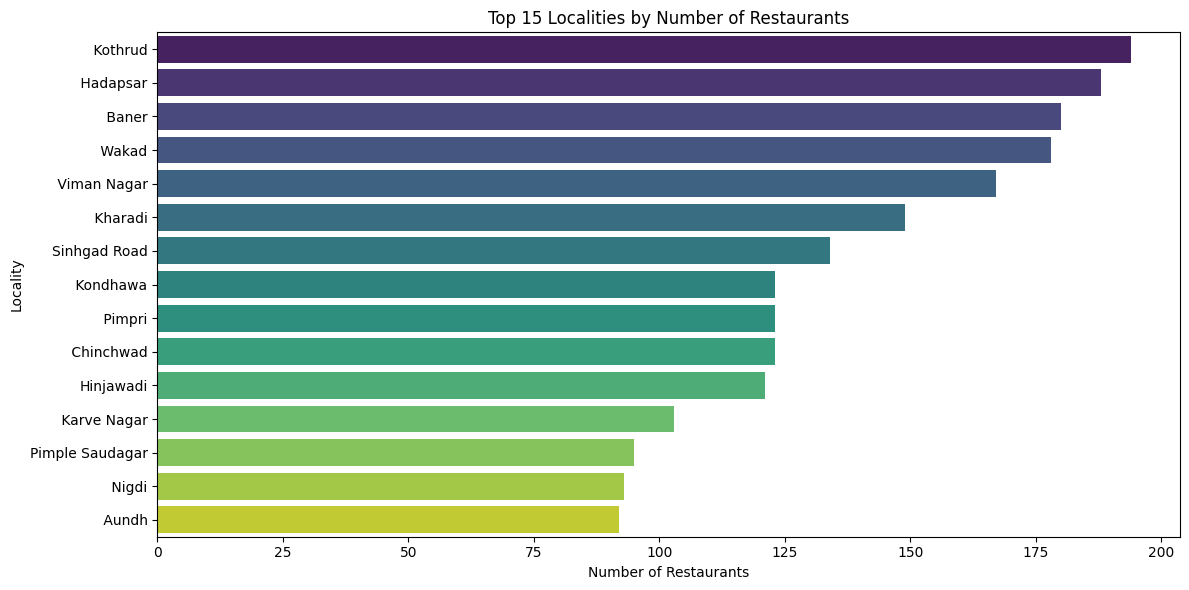

In [ ]:
# Count restaurants per locality
locality_counts = zomato_for_eda['Locality in Pune'].value_counts()

# Plot the top 15
plt.figure(figsize=(12, 6))
sns.barplot(x=locality_counts.head(15).values, y=locality_counts.head(15).index, palette="viridis")

plt.title("Top 15 Localities by Number of Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Locality")
plt.tight_layout()
plt.show()

## **Listing All Cuisines**

In [ ]:
# List of cuisine columns
cuisine_cols = [f'Cuisine{i}' for i in range(1, 9)]

# Flatten, drop NAs and "MISSING", then get unique values
all_cuisines = pd.unique(
    zomato_for_eda[cuisine_cols]
    .values
    .ravel()
)

# Clean list
unique_cuisines = sorted([c for c in all_cuisines if pd.notna(c) and c != 'MISSING'])

# Display
print("Number of unique cuisines:", len(unique_cuisines))
print(unique_cuisines)


Number of unique cuisines: 46
['Asian', 'Asian (unspecified)', 'BBQ', 'Bakery', 'Bar Food', 'Beverages', 'Burger', 'Chinese', 'Coffee', 'Coffee and Tea', 'Desserts', 'East Asian', 'European', 'Fast Food', 'Finger Food', 'Healthy Food', 'Himalayan', 'Ice Cream', 'Indian (other)', 'Juices', 'Kebab', 'Korean', 'Mediterranean', 'Mexican', 'Middle Eastern', 'North Eastern', 'North Indian', 'Oriental', 'Other Indian', 'Paan', 'Pasta', 'Pizza', 'Quick eats', 'Rajasthani', 'Raw Meats', 'Roast Chicken', 'Rolls', 'Sandwich', 'Seafood', 'South Indian', 'Southeast Asian', 'Steak', 'Street Food', 'Tea', 'The Americas', 'Wraps']


## **Correlation between Pricing_for_2 and Dining_Rating.**
This is to be able to understand if pricing is "cheaper" gains a better rating as a restaurant. However, this is just a shallow experiment as Pricing can't be the only factor in a high-rating.

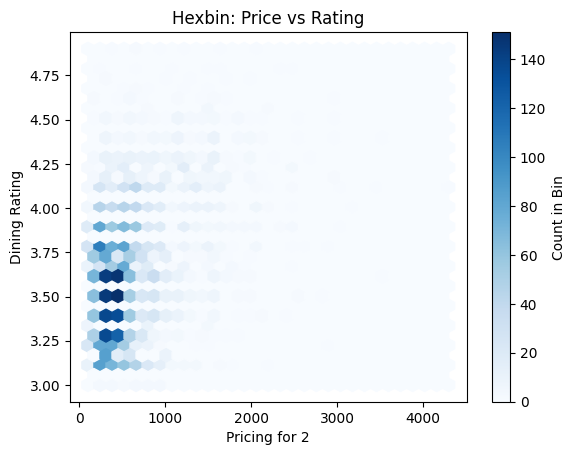

In [ ]:
plt.hexbin(zomato_for_eda['Pricing_for_2'], zomato_for_eda['Dining_Rating'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.xlabel('Pricing for 2')
plt.ylabel('Dining Rating')
plt.title('Hexbin: Price vs Rating')
plt.show()

In [ ]:
correlation = zomato_for_eda[['Pricing_for_2', 'Dining_Rating']].corr()
print("Correlation between Pricing and Rating:")
print(correlation)

Correlation between Pricing and Rating:
               Pricing_for_2  Dining_Rating
Pricing_for_2       1.000000       0.358431
Dining_Rating       0.358431       1.000000


## **Correlation between Locality and Cuisine (1-8) to Dining_Rating.**
We proceed to test if there is a correlation between a cuisine served in certain locality. Such that, if for instance, `Mediterranean` and `European` cuisines served in	`Koregaon Park` receives a high rating whilst `Coffee` and `Desserts` served in the same locale has low-ratings.

In [ ]:
# Reshape cuisine columns into one
cuisine_cols = [f'Cuisine{i}' for i in range(1, 9)]

# Melt cuisine columns
long_df = zomato_for_eda.melt(
    id_vars=['Dining_Rating', 'Locality in Pune'],
    value_vars=cuisine_cols,
    var_name='CuisineCol',
    value_name='Cuisine'
)

# Drop missing cuisines
long_df = long_df.dropna(subset=['Cuisine'])

# Grouping
rating_by_combo = (
    long_df
    .groupby(['Cuisine', 'Locality in Pune'])['Dining_Rating']
    .mean()
    .reset_index()
    .rename(columns={'Dining_Rating': 'Avg_Rating'})
)

# Top 15 highest-rated cuisine-location combos.
# Maintains the original index of the row.
rating_by_combo.sort_values('Avg_Rating', ascending=False).head(15)

# Revises the index starting from 0.
# Uncomment if prefer to use original indexing.
    # cleaned_top = rating_by_combo.sort_values('Avg_Rating', ascending=False).head(15).reset_index(drop=True)
    # cleaned_top # Prints



Cuisine      Locality in Pune  Avg_Rating
1322         Other Indian       Deccan Gymkhana        4.90
301        Coffee and Tea       Deccan Gymkhana        4.90
699          Healthy Food       Deccan Gymkhana        4.90
738             Himalayan                 Baner        4.90
975                 Kebab   Senapati Bapat Road        4.80
1689         South Indian         Koregaon Park        4.76
70                    BBQ             Hinjawadi        4.70
687           Finger Food         Koregaon Park        4.70
290                Coffee               Kothrud        4.70
1095        Mediterranean         Koregaon Park        4.60
1091        Mediterranean                 Aundh        4.55
287               Chinese               Kothrud        4.50
749             Himalayan                Khadki        4.50
516            East Asian            Nagar Road        4.50
39    Asian (unspecified)   Senapati Bapat Road        4.50

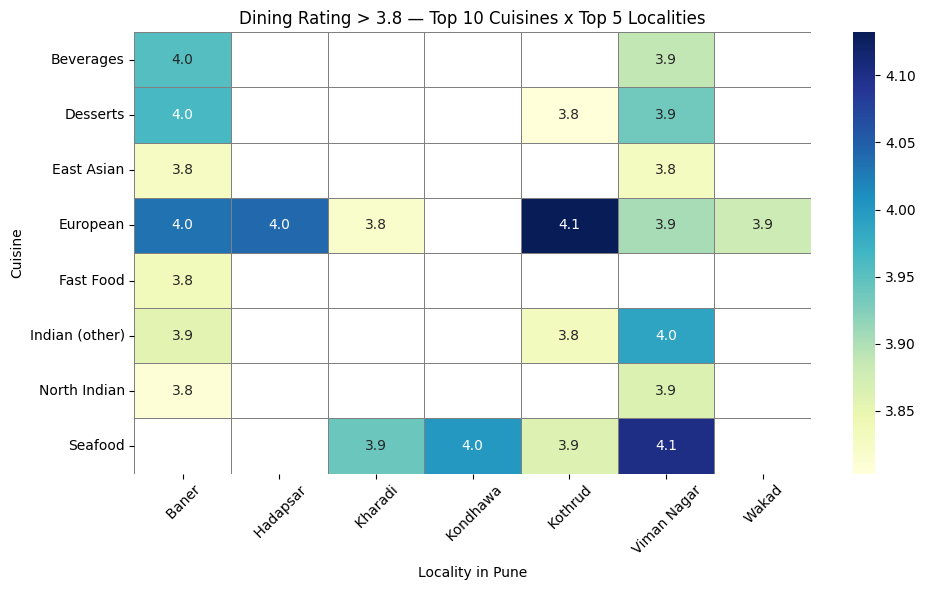

In [ ]:
# Filter to threshold. Only Avg_Rating over 3.8
filtered = rating_by_combo[rating_by_combo['Avg_Rating'] > 3.8]

# Keep only top cuisines and localities by frequency
top_cuisines = (
    long_df['Cuisine'].value_counts()
    .loc[lambda x: x.index != 'MISSING']
    .head(10).index
)

top_localities = long_df['Locality in Pune'].value_counts().head(10).index

# Apply filter
filtered = filtered[
    (filtered['Cuisine'].isin(top_cuisines)) &
    (filtered['Locality in Pune'].isin(top_localities))
]

# Pivot
heatmap_data = filtered.pivot(
    index="Cuisine",
    columns="Locality in Pune",
    values="Avg_Rating"
)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=0.5, linecolor='gray')
plt.title("Dining Rating > 3.8 — Top 10 Cuisines x Top 5 Localities")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

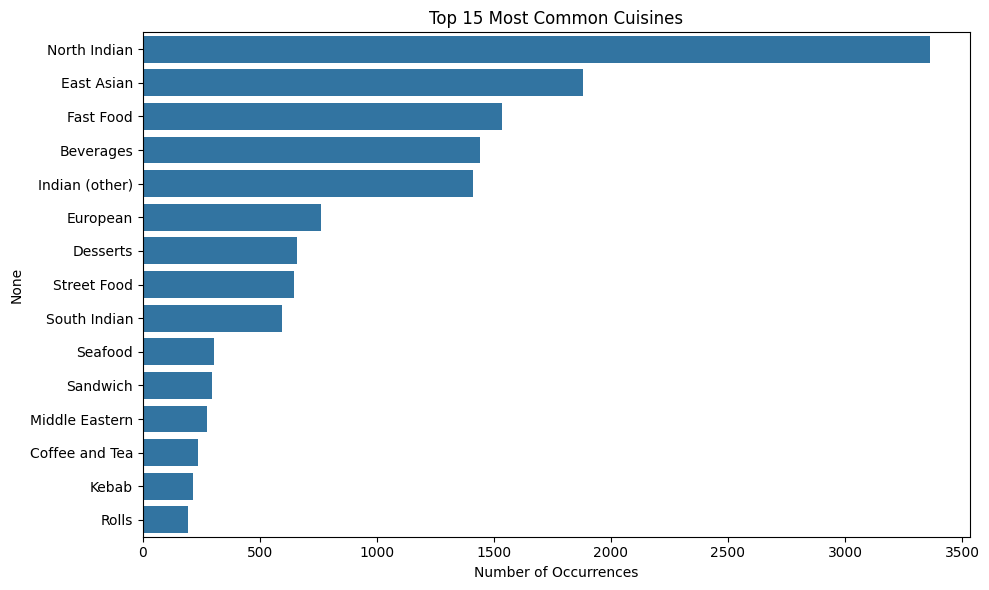

In [ ]:
# Define the features and filter the DataFrame
input_features = ["Cuisine1", "Cuisine2", "Cuisine3", "Cuisine4",
                  "Cuisine5", "Cuisine6", "Cuisine7", "Cuisine8",
                  "Pricing_for_2", "Locality in Pune"]

X = zomato_for_eda.filter(items=input_features)

# all cuisines
cuisine_cols = [f'Cuisine{i}' for i in range(1, 9)]
cuisines_flat = pd.Series(X[cuisine_cols].values.ravel())

# Clean values
cuisines_flat = cuisines_flat.replace("MISSING", np.nan).dropna()

# Count top 15
cuisines_freq = cuisines_flat.value_counts().head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cuisines_freq.values, y=cuisines_freq.index)
plt.title("Top 15 Most Common Cuisines")
plt.xlabel("Number of Occurrences")
plt.tight_layout()
plt.show()


## **More EDA**

In [ ]:
# Set rating threshold
rating_threshold = 3.75 ## Bhatia et. al. 2023

# First-level helper functions
def find_percent(df, feature_group, feature):
    feature_filter = df.loc[df[feature_group] == feature]
    if not feature_filter.empty:
        percent_above_cutoff = 100 - percentileofscore(
            feature_filter['Dining_Rating'], rating_threshold, kind='strict'
        )
    else:
        percent_above_cutoff = 0
    return percent_above_cutoff

def find_mean_rating(df, feature_group, feature):
    feature_filter = df.loc[df[feature_group] == feature]
    return feature_filter['Dining_Rating'].mean() if not feature_filter.empty else np.nan

# Second-level EDA helper
def eda_resto_data_numerical(df, feature_group):
    feature_list = pd.unique(df[feature_group]).tolist()
    feature_list2 = [feature for feature in feature_list if feature != 'MISSING' and pd.notnull(feature)]

    percent_exceeding_cutoff_feature = []
    average_per_cutoff_feature = []

    for feature in feature_list2:
        above_threshold = round(find_percent(df, feature_group, feature), 4)
        percent_exceeding_cutoff_feature.append(above_threshold)

        mean_rating = round(find_mean_rating(df, feature_group, feature), 4)
        average_per_cutoff_feature.append(mean_rating)

    # MinMax scaling
    scaler = MinMaxScaler()
    mean_scaled = scaler.fit_transform(np.array(average_per_cutoff_feature).reshape(-1, 1)).flatten()
    mean_scaled = [round(score, 4) for score in mean_scaled]

    # Create summary DataFrame
    df_mean_feature = pd.DataFrame({
        feature_group: feature_list2,
        '% Above 3.75': percent_exceeding_cutoff_feature,
        'Mean Rating': average_per_cutoff_feature,
        'MinMax Scale Score': mean_scaled
    })

    df_mean_feature = df_mean_feature.sort_values(by=['Mean Rating', feature_group], ascending=[False, True]).reset_index(drop=True)
    df_mean_feature['Rank'] = df_mean_feature.index + 1

    return df_mean_feature

In [ ]:
eda_locality = eda_resto_data_numerical(zomato_for_eda, 'Locality in Pune')
eda_locality.head()

Locality in Pune  % Above 3.75  Mean Rating  MinMax Scale Score  Rank
0    Koregaon Park       79.7619       4.0833              1.0000     1
1      East Street       78.5714       4.0214              0.9234     2
2          Bopkhel      100.0000       4.0000              0.8969     3
3          Yerwada       75.0000       3.9000              0.7732     4
4    Kalyani Nagar       54.9020       3.8941              0.7659     5

In [ ]:
eda_resto_cuisine1 = eda_resto_data_numerical(zomato_for_eda, 'Cuisine1')
eda_resto_cuisine1.head()

Cuisine1  % Above 3.75  Mean Rating  MinMax Scale Score  Rank
0        Mediterranean      100.0000       4.3000              1.0000     1
1      Southeast Asian       85.7143       4.1429              0.7959     2
2             Bar Food       76.4706       4.0529              0.6790     3
3  Asian (unspecified)       66.6667       3.9909              0.5985     4
4             European       69.6552       3.9683              0.5691     5

In [ ]:
eda_resto_cuisine2 = eda_resto_data_numerical(zomato_for_eda, 'Cuisine2')
eda_resto_cuisine2.head()

Cuisine2  % Above 3.75  Mean Rating  MinMax Scale Score  Rank
0                Steak      100.0000       4.4000              1.0000     1
1        Mediterranean      100.0000       4.1333              0.7205     2
2                  BBQ       83.3333       4.1000              0.6856     3
3  Asian (unspecified)       74.4681       4.0404              0.6231     4
4      Southeast Asian       74.0741       4.0222              0.6041     5

In [ ]:
eda_resto_cuisine3 = eda_resto_data_numerical(zomato_for_eda, 'Cuisine3')
eda_resto_cuisine3.head()

Cuisine3  % Above 3.75  Mean Rating  MinMax Scale Score  Rank
0            Raw Meats      100.0000       4.2000              1.0000     1
1             Oriental       83.3333       4.1667              0.9546     2
2        Mediterranean       60.0000       4.1400              0.9182     3
3         Healthy Food       77.7778       4.0556              0.8031     4
4  Asian (unspecified)       82.8571       4.0457              0.7896     5

In [ ]:
eda_resto_cuisine4 = eda_resto_data_numerical(zomato_for_eda, 'Cuisine4')
eda_resto_cuisine4.head()

Cuisine4  % Above 3.75  Mean Rating  MinMax Scale Score  Rank
0            BBQ      100.0000       4.4000              1.0000     1
1         Bakery       75.0000       4.2250              0.8250     2
2  Mediterranean      100.0000       4.2000              0.8000     3
3   Healthy Food       91.6667       4.1125              0.7125     4
4  Roast Chicken      100.0000       4.1000              0.7000     5

In [ ]:
eda_resto_cuisine5 = eda_resto_data_numerical(zomato_for_eda, 'Cuisine5')
eda_resto_cuisine5.head()

Cuisine5  % Above 3.75  Mean Rating  MinMax Scale Score  Rank
0                Steak      100.0000       4.3000              1.0000     1
1  Asian (unspecified)       83.3333       4.1750              0.8399     2
2               Bakery      100.0000       4.1000              0.7439     3
3         The Americas      100.0000       4.0500              0.6799     4
4                  BBQ       66.6667       4.0333              0.6585     5

In [ ]:
eda_resto_cuisine6 = eda_resto_data_numerical(zomato_for_eda, 'Cuisine6')
eda_resto_cuisine6.head()

Cuisine6  % Above 3.75  Mean Rating  MinMax Scale Score  Rank
0                Steak         100.0         4.30              1.0000     1
1  Asian (unspecified)         100.0         4.20              0.8929     2
2           Quick eats         100.0         4.20              0.8929     3
3      Southeast Asian         100.0         4.15              0.8393     4
4         Healthy Food          80.0         4.00              0.6786     5

In [ ]:
eda_resto_cuisine7 = eda_resto_data_numerical(zomato_for_eda, 'Cuisine7')
eda_resto_cuisine7.head()

Cuisine7  % Above 3.75  Mean Rating  MinMax Scale Score  Rank
0        Coffee      100.0000       4.5000              1.0000     1
1         Pasta      100.0000       4.2000              0.7857     2
2  Healthy Food      100.0000       4.0000              0.6429     3
3        Burger      100.0000       3.9500              0.6071     4
4      European       71.4286       3.9286              0.5919     5

In [ ]:
eda_resto_cuisine8 = eda_resto_data_numerical(zomato_for_eda, 'Cuisine8')
eda_resto_cuisine8.head()

Cuisine8  % Above 3.75  Mean Rating  MinMax Scale Score  Rank
0       Tea      100.0000       4.3000              1.0000     1
1  Sandwich       50.0000       4.1000              0.7778     2
2   Mexican      100.0000       4.0000              0.6667     3
3    Burger       66.6667       3.9667              0.6297     4
4   Seafood      100.0000       3.9333              0.5926     5

In [ ]:
zomato_pune_yes = zomato_for_eda[zomato_for_eda['Dining_Rating'] >= 3.8]
zomato_pune_yes.head()

Restaurant_Name        Cuisine1      Cuisine2  \
0             Santè Spa Cuisine        European  Healthy Food   
1                    Le Plaisir  Coffee and Tea      European   
2                          Gong      East Asian    East Asian   
3  The French Window Patisserie  Coffee and Tea      Desserts   
4                    Savya Rasa    South Indian  South Indian   

              Cuisine3      Cuisine4   Cuisine5      Cuisine6   Cuisine7  \
0        Mediterranean       MISSING    MISSING       MISSING    MISSING   
1             European  Healthy Food   Sandwich  Other Indian  Beverages   
2  Asian (unspecified)     Himalayan  Beverages       MISSING    MISSING   
3             European        Bakery   European       MISSING    MISSING   
4         South Indian  South Indian  Beverages       MISSING    MISSING   

  Cuisine8  Pricing_for_2  Locality in Pune  Dining_Rating  
0  MISSING           1200     Koregaon Park            4.9  
1  MISSING           1000   Deccan Gymkhana            4.9  
2  MISSING           1700             Baner            4.9  
3  MISSING            600     Koregaon Park            4.9  
4  MISSING           2100     Koregaon Park            4.9

In [ ]:
zomato_pune_no = zomato_for_eda[zomato_for_eda['Dining_Rating'] < 3.8]
zomato_pune_no.head()

Restaurant_Name        Cuisine1        Cuisine2        Cuisine3  \
1643  Pathik Biryani House  Indian (other)    North Indian  Indian (other)   
1644       Kynd Cafe & Bar      Quick eats        European       Fast Food   
1645             Annapurna    North Indian     Street Food         MISSING   
1646               Basilio    North Indian      East Asian        Desserts   
1647          Grand Darbar    North Indian  Indian (other)      East Asian   

       Cuisine4   Cuisine5 Cuisine6 Cuisine7 Cuisine8  Pricing_for_2  \
1643    MISSING    MISSING  MISSING  MISSING  MISSING            500   
1644   Desserts  Beverages  MISSING  MISSING  MISSING           1500   
1645    MISSING    MISSING  MISSING  MISSING  MISSING            500   
1646  Beverages    MISSING  MISSING  MISSING  MISSING            700   
1647    MISSING    MISSING  MISSING  MISSING  MISSING            650   

     Locality in Pune  Dining_Rating  
1643           Pimpri            3.7  
1644          Mundhwa            3.7  
1645         Lonavala            3.7  
1646           Pimpri            3.7  
1647       Magarpatta            3.7

<ipython-input-25-5749dab0ac4b>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


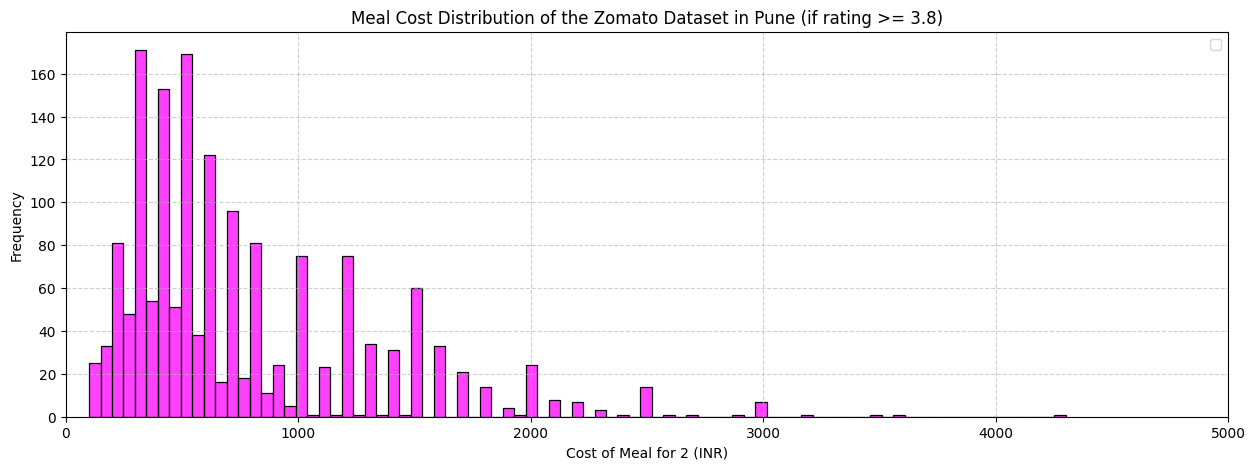

In [ ]:
min_cost = min(zomato_pune_yes['Pricing_for_2'])
max_cost = max(zomato_pune_yes['Pricing_for_2'])

num_bins = int((max_cost - min_cost) / 50) + 1
num_bins

plt.figure(figsize=(15, 5))
sns.histplot(zomato_pune_yes['Pricing_for_2'], bins = num_bins, color='magenta')
plt.title("Meal Cost Distribution of the Zomato Dataset in Pune (if rating >= 3.8)")
plt.xlabel("Cost of Meal for 2 (INR)")
plt.xlim(0, 5000)
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

<ipython-input-26-6415382fb8cb>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


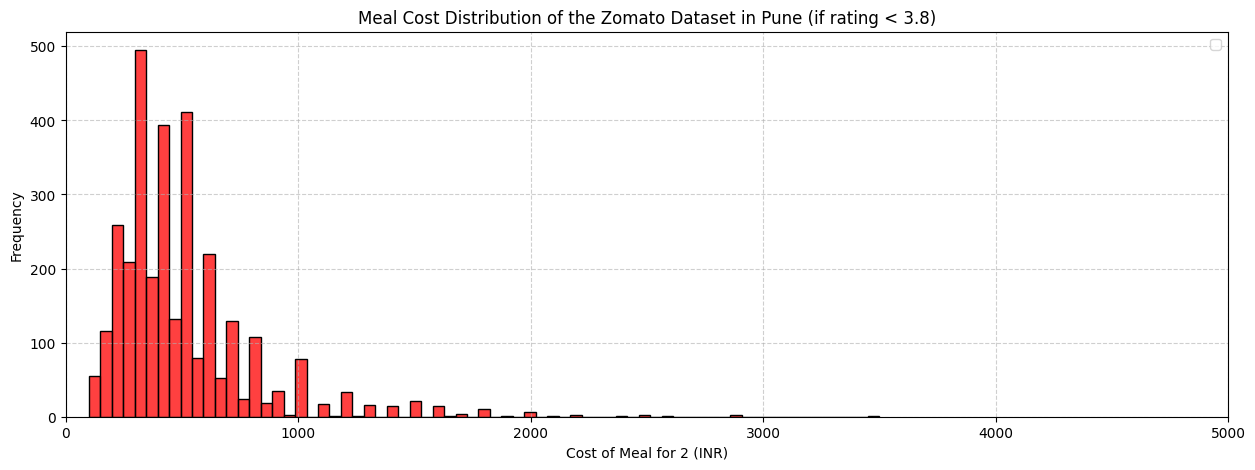

In [ ]:
min_cost = min(zomato_pune_no['Pricing_for_2'])
max_cost = max(zomato_pune_no['Pricing_for_2'])

num_bins = int((max_cost - min_cost) / 50) + 1
num_bins

plt.figure(figsize=(15, 5))
sns.histplot(zomato_pune_no['Pricing_for_2'], bins = num_bins, color='red')
plt.title("Meal Cost Distribution of the Zomato Dataset in Pune (if rating < 3.8)")
plt.xlabel("Cost of Meal for 2 (INR)")
plt.xlim(0, 5000)
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## **Descriptive and Inferential statistics**
For the two subgroups of the dataset, we take the mean price (in Indian Rupees), standard deviation and number of instances per classification in this dataset. Then we do the unequal variances t-test.

In [ ]:
zomato_price_overall = zomato_for_eda['Pricing_for_2']
zomato_prices_yes = np.array(zomato_pune_yes['Pricing_for_2'])
zomato_prices_no = np.array(zomato_pune_no['Pricing_for_2'])

mean_prices_overall = np.mean(zomato_price_overall)
mean_prices_yes = np.mean(zomato_prices_yes)
mean_prices_no = np.mean(zomato_prices_no)

stdev_prices_overall = np.std(zomato_price_overall, ddof=1) ## Sample standard deviation hence N - 1 degrees of freedom
stdev_prices_yes = np.std(zomato_prices_yes, ddof=1) ## Sample standard deviation hence N - 1 degrees of freedom
stdev_prices_no = np.std(zomato_prices_no, ddof=1)

count_prices_overall = len(zomato_price_overall)
count_prices_yes = len(zomato_prices_yes)
count_prices_no = len(zomato_prices_no)


print("Overall distribution")
print(f"Mean Price: {mean_prices_overall:.2f}")
print(f"Standard Deviation: {stdev_prices_overall:.2f}")
print(f"Number of Instances: {count_prices_overall}")

print("\nFor Pune Restaurants with rating >= 3.8")
print(f"Mean Price: {mean_prices_yes:.2f}")
print(f"Standard Deviation: {stdev_prices_yes:.2f}")
print(f"Number of Instances: {count_prices_yes}")

print("\nFor Pune Restaurants with rating < 3.8")
print(f"Mean Price: {mean_prices_no:.2f}")
print(f"Standard Deviation: {stdev_prices_no:.2f}")
print(f"Number of Instances: {count_prices_no}")

t_value, p_value = stats.ttest_ind(zomato_prices_yes, zomato_prices_no, equal_var=False)
print(f"p-Value: {p_value}")

Overall distribution
Mean Price: 571.87
Standard Deviation: 425.31
Number of Instances: 4797

For Pune Restaurants with rating >= 3.8
Mean Price: 746.14
Standard Deviation: 545.78
Number of Instances: 1643

For Pune Restaurants with rating < 3.8
Mean Price: 481.09
Standard Deviation: 309.76
Number of Instances: 3154
p-Value: 3.535973267390743e-69


In [ ]:
## Map the cuisines to numerical features according
## Instead of mapping 'MISSING': to zero
## We now map "MISSING" as the (N + 1)th feature



#def feature_map(feature_df, row_feature):
#    feature_map = {}
#
#    for index, row in feature_df.iterrows():
#        feature_name = row[row_feature]
#        rank = row['Rank']
#
#        feature_map[feature_name] = rank - 1 ## To account for the requirements of Mixed Naive Bayes
#
#    feature_map['MISSING'] = len(feature_map)
    ## Heads up: From now on, MISSING will be rank N + 1, but encoded as index N
    ## This is to ensure that the behavior of mixed Naive Bayes will function as intended.
#    return feature_map

def feature_map(feature_df, row_feature):
    feature_map = {'MISSING': 0}

    for index, row in feature_df.iterrows():
        feature_name = row[row_feature]
        rank = row['Rank']

        feature_map[feature_name] = rank - 1 ## To account for the requirements of Mixed Naive Bayes
    ## Heads up: From now on, MISSING will be rank N + 1, but encoded as index N
    ## This is to ensure that the behavior of mixed Naive Bayes will function as intended.
    return feature_map

# Create mappings for cuisine 1 to cuisine 8
cuisine1_map = feature_map(eda_resto_cuisine1, 'Cuisine1')
cuisine2_map = feature_map(eda_resto_cuisine2, 'Cuisine2')
cuisine3_map = feature_map(eda_resto_cuisine3, 'Cuisine3')
cuisine4_map = feature_map(eda_resto_cuisine4, 'Cuisine4')
cuisine5_map = feature_map(eda_resto_cuisine5, 'Cuisine5')
cuisine6_map = feature_map(eda_resto_cuisine6, 'Cuisine6')
cuisine7_map = feature_map(eda_resto_cuisine7, 'Cuisine7')
cuisine8_map = feature_map(eda_resto_cuisine8, 'Cuisine8')

# Create mapping for locality
locality_map = feature_map(eda_locality, 'Locality in Pune')

# map the columns for cuisine
zomato_for_eda['Cuisine1'] = zomato_for_eda['Cuisine1'].map(cuisine1_map)
zomato_for_eda['Cuisine2'] = zomato_for_eda['Cuisine2'].map(cuisine2_map)
zomato_for_eda['Cuisine3'] = zomato_for_eda['Cuisine3'].map(cuisine3_map)
zomato_for_eda['Cuisine4'] = zomato_for_eda['Cuisine4'].map(cuisine4_map)
zomato_for_eda['Cuisine5'] = zomato_for_eda['Cuisine5'].map(cuisine5_map)
zomato_for_eda['Cuisine6'] = zomato_for_eda['Cuisine6'].map(cuisine6_map)
zomato_for_eda['Cuisine7'] = zomato_for_eda['Cuisine7'].map(cuisine7_map)
zomato_for_eda['Cuisine8'] = zomato_for_eda['Cuisine8'].map(cuisine8_map)

# Map the columns for locality in Pune
zomato_for_eda['Locality in Pune'] = zomato_for_eda['Locality in Pune'].map(locality_map)

# Create binary classification column
zomato_for_eda['isHighRating'] = (zomato_for_eda['Dining_Rating'] >= rating_threshold).astype(int)

# Drop the original numerical rating column
zomato_for_eda = zomato_for_eda.drop(columns=['Dining_Rating'])

# Reorder columns to ensure binary classification is at the rightmost position
zomato_for_eda = zomato_for_eda[[col for col in zomato_for_eda.columns if col not in ['isHighRating']] + ['isHighRating']]

In [ ]:
input_features = ["Cuisine1", "Cuisine2", "Cuisine3", "Cuisine4", "Cuisine5", "Cuisine6", "Cuisine7", "Cuisine8", "Pricing_for_2", "Locality in Pune"]

X = zomato_for_eda.filter(items = input_features)
X

Cuisine1  Cuisine2  Cuisine3  Cuisine4  Cuisine5  Cuisine6  Cuisine7  \
0            4         8         2         0         0         0         0   
1           10         6        13         3        25         6         8   
2           29        24         4        25        18         0         0   
3           10        14        13         1        10         0         0   
4           23        28        22        18        18         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
4792        22        28        24        23        12        25         8   
4793        25        33        23         0         0         0         0   
4794        27         0         0         0         0         0         0   
4795        22        17        28        29        17        29         0   
4796        22         6        24        13        18         0         0   

      Cuisine8  Pricing_for_2  Locality in Pune  
0            0           1200                 0  
1            0           1000                10  
2            0           1700                 8  
3            0            600                 0  
4            0           2100                 0  
...        ...            ...               ...  
4792         0            600                84  
4793         0            400                24  
4794         0            400                24  
4795         0           1000                84  
4796         0            850                53  

[4797 rows x 10 columns]

In [ ]:
y = zomato_for_eda["isHighRating"]
y

0       1
1       1
2       1
3       1
4       1
       ..
4792    0
4793    0
4794    0
4795    0
4796    0
Name: isHighRating, Length: 4797, dtype: int64

## **GINI**
> The GINI score is calculated to understand the underlying relationships between each feature with respect to the `Dining_Rating`.

In [ ]:
def calculate_gini_importance(X, y, random_state=45):
    model = DecisionTreeClassifier(random_state=random_state)
    model.fit(X, y)

    feature_importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'GINI Importance': feature_importances
    }).sort_values(by='GINI Importance', ascending=False).reset_index(drop=True)

    return importance_df


In [ ]:
# Assuming X is a DataFrame and y is your target vector
gini_df = calculate_gini_importance(X, y)
print(gini_df)

            Feature  GINI Importance
0  Locality in Pune         0.283250
1     Pricing_for_2         0.227793
2          Cuisine2         0.132390
3          Cuisine1         0.114073
4          Cuisine3         0.098783
5          Cuisine4         0.084095
6          Cuisine5         0.031267
7          Cuisine6         0.017475
8          Cuisine7         0.008317
9          Cuisine8         0.002556


## **Feature Importance**
> This is the percent at which the data set tend to train itself with. It can be seen that the features: `Locality in Pune` & `Pricing_for_2` are the highest influencing factors when it comes to training the data set. While we cannot infer that the `Cuisines` are "irrelevant", it can be argued that these are not the **'focus'** of the model prediction.

In [ ]:
feature_importances = pd.Series(dec_tree2.feature_importances_, index=X_clean.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances.head(10))

NameError: name 'dec_tree2' is not defined

### **Post-EDA**

After testing various statistical methods for EDA, ...

---

# **V. Decision Tree Implementation (DT)**

## **Decision Tree Implementation (DT1)**

In [ ]:
## 70% train, 30% others (as a working concept, assume that other)
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size = 0.3, random_state = 45)

In [ ]:
dec_tree = DecisionTreeClassifier(random_state = 45)
dec_tree.fit(X_train, y_train)

print("DataFrame with MISSING set to 0:")
print(X_train.head())

DataFrame with MISSING set to 0:
      Cuisine1  Cuisine2  Cuisine3  Cuisine4  Cuisine5  Cuisine6  Cuisine7  \
4268        14        25        26        22         0         0         0   
2885        22        12         0         0         0         0         0   
1489        22        26         0         0         0         0         0   
1357        26         0         0         0         0         0         0   
1130        22        24         0         0         0         0         0   

      Cuisine8  Pricing_for_2  Locality in Pune  
4268         0            300                41  
2885         0            600                62  
1489         0            200                30  
1357         0            150                63  
1130         0            450                24  


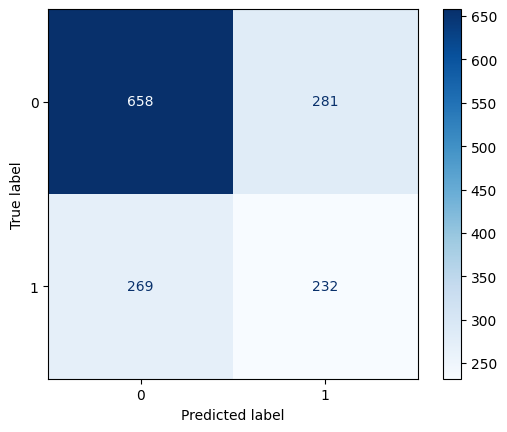

In [ ]:
y_pred = dec_tree.predict(X_other)
cm = confusion_matrix(y_other, y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels = dec_tree.classes_)
cm_display.plot(cmap = plt.cm.Blues)
plt.show()

In [ ]:
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
accuracy = accuracy_score(y_other, y_pred)
print(f"True Positives: {tp}")
print(f"Sensitivity: {sensitivity*100:.2f} %")
print(f"Specificity: {specificity*100:.2f} %")
print(f"Accuracy: {accuracy*100:.2f} %")


True Positives: 232
Sensitivity: 46.31 %
Specificity: 70.07 %
Accuracy: 61.81 %


In [ ]:
## I commented out the confusion matrices so to make this neater. Eventually, we will delete these lines.

def DecisionTreeImplementor1(instance, random_state, accuracy_list, sensitivity_list, specificity_list):

  X_train, X_other, y_train, y_other = train_test_split(X, y, test_size = 0.3, random_state = random_state)

  # Instantiate last instance
  accuracy_list = accuracy_list
  sensitivity_list = sensitivity_list
  specificity_list = specificity_list

  dec_tree = DecisionTreeClassifier(random_state = random_state)
  dec_tree.fit(X_train, y_train)

  y_pred = dec_tree.predict(X_other)
  cm = confusion_matrix(y_other, y_pred)
  #cm_display = ConfusionMatrixDisplay(cm, display_labels = dec_tree.classes_)
  #cm_display.plot(cmap = plt.cm.Blues)
  #plt.show()

  tn, fp, fn, tp = cm.ravel()
  sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
  specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
  accuracy = accuracy_score(y_other, y_pred)
  print(f"True Positives: {tp}")
  print(f"Sensitivity: {sensitivity*100:.2f} %")
  print(f"Specificity: {specificity*100:.2f} %")
  print(f"Accuracy: {accuracy*100:.2f} %")

  accuracy_list.append(round(100*accuracy, 2))
  sensitivity_list.append(float(round(100*sensitivity, 2)))
  specificity_list.append(float(round(100*specificity, 2)))

  # Updated instantiation
  accuracy_list = accuracy_list
  sensitivity_list = sensitivity_list
  specificity_list = specificity_list

  return accuracy_list, sensitivity_list, specificity_list


random_state_list = [45, 65, 105, 225, 335]

accuracy_list_DT1 = []
sensitivity_list_DT1 = []
specificity_list_DT1 = []

for i in range(len(random_state_list)):
  accuracy_list_DT1, sensitivity_list_DT1, specificity_list_DT1 = DecisionTreeImplementor1(i, random_state_list[i], accuracy_list_DT1, sensitivity_list_DT1, specificity_list_DT1)

mean_accuracy_DT1 = round(np.mean(accuracy_list_DT1), 2)
mean_sensitivity_DT1 = round(np.mean(sensitivity_list_DT1), 2)
mean_specificity_DT1 = round(np.mean(specificity_list_DT1), 2)

## Sample standard deviation
standev_accuracy_DT1 = round(np.std(accuracy_list_DT1, ddof = 1), 2)
standev_sensitivity_DT1 = round(np.std(sensitivity_list_DT1, ddof = 1), 2)
standev_specificity_DT1 = round(np.std(specificity_list_DT1, ddof = 1), 2)

print(f"For {len(random_state_list)} iterations of Decision Tree Classifier")
print(f"Accuracy — mean: {mean_accuracy_DT1}%, standard deviation: {standev_accuracy_DT1}%")
print(f"Sensitivity — mean: {mean_sensitivity_DT1}%, standard deviation: {standev_sensitivity_DT1}%")
print(f"Specificity — mean: {mean_specificity_DT1}%, standard deviation: {standev_specificity_DT1}%")
print("")

True Positives: 232
Sensitivity: 46.31 %
Specificity: 70.07 %
Accuracy: 61.81 %
True Positives: 235
Sensitivity: 46.17 %
Specificity: 73.36 %
Accuracy: 63.75 %
True Positives: 209
Sensitivity: 43.91 %
Specificity: 73.96 %
Accuracy: 64.03 %
True Positives: 244
Sensitivity: 49.39 %
Specificity: 70.61 %
Accuracy: 63.33 %
True Positives: 222
Sensitivity: 45.77 %
Specificity: 73.09 %
Accuracy: 63.89 %
For 5 iterations of Decision Tree Classifier
Accuracy — mean: 63.36%, standard deviation: 0.91%
Sensitivity — mean: 46.31%, standard deviation: 1.97%
Specificity — mean: 72.22%, standard deviation: 1.75%



The current Decisition Tree (DT1) implementation consists of the basic cleaned data. This means that we've decided to keep the `MISSING` values that occur in the way the data is collected. While restaurants may have 1-2 cuisines, some have over 2 cuisines served. This is the reason why there is `cuisine 1 to 8` in the dataset. As such, `MISSING` values may incur false-negative results in predicting `Dining_Ratings`.

We tried making Decision Tree classifiers by performing this across several random states: `45`, `65`, `105`, `225`, `335`. In this case, DT1 has a mean accuracy of `63.50%`.

## **Decision Tree Implementation 2 (DT2)**

For DT2, the dataset has been further cleaned by removing ` MISSING ` values and making sure that there are no _"Junk"_ data that possibly makes Decision Trees lose its accuracy.

In [ ]:
# Replace 'MISSING' (0) with -1
cuisine_cols = [f'Cuisine{i}' for i in range(1, 9)]
X_all = zomato_for_eda.drop(columns=['isHighRating']).copy()
X_all[cuisine_cols] = X_all[cuisine_cols].replace(0, -1)

# Keep only numeric columns (drop Restaurant_Name etc.)
X_clean = X_all.select_dtypes(include=[np.number])
y_clean = zomato_for_eda['isHighRating']

print("Cleaned DataFrame with MISSING features replaced with -1:")
print(X_clean.head())


Cleaned DataFrame with MISSING features replaced with -1:
   Cuisine1  Cuisine2  Cuisine3  Cuisine4  Cuisine5  Cuisine6  Cuisine7  \
0         4         8         2        -1        -1        -1        -1   
1        10         6        13         3        25         6         8   
2        29        24         4        25        18        -1        -1   
3        10        14        13         1        10        -1        -1   
4        23        28        22        18        18        -1        -1   

   Cuisine8  Pricing_for_2  Locality in Pune  
0        -1           1200                 0  
1        -1           1000                10  
2        -1           1700                 8  
3        -1            600                 0  
4        -1           2100                 0  


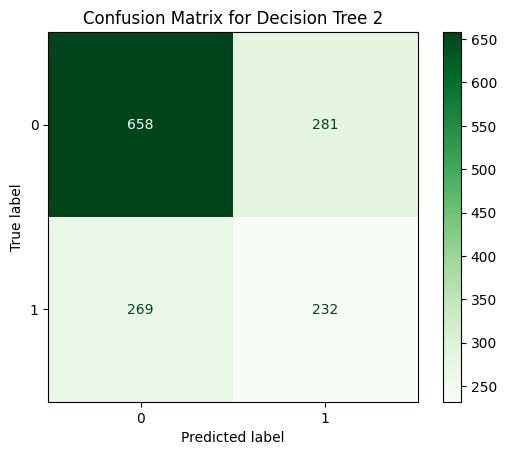

In [ ]:
# Train-test split
X_train2, X_other2, y_train2, y_other2 = train_test_split(X_clean, y_clean, test_size=0.3, random_state=45)

# Train the model
dec_tree2 = DecisionTreeClassifier(random_state=45)
dec_tree2.fit(X_train2, y_train2)

# Predict and evaluate
y_pred2 = dec_tree2.predict(X_other2)
cm2 = confusion_matrix(y_other2, y_pred2)
cm_display2 = ConfusionMatrixDisplay(cm2, display_labels=dec_tree2.classes_)
cm_display2.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix for Decision Tree 2")
plt.show()

In [ ]:
# Metrics
tn2, fp2, fn2, tp2 = cm2.ravel()
sensitivity2 = tp2 / (tp2 + fn2) if (tp2 + fn2) != 0 else 0
specificity2 = tn2 / (tn2 + fp2) if (tn2 + fp2) != 0 else 0
accuracy2 = accuracy_score(y_other2, y_pred2)

print(f"Decision Tree 2 Metrics (Ignoring MISSING features):")
print(f"True Positives: {tp2}")
print(f"Sensitivity: {sensitivity2*100:.2f} %")
print(f"Specificity: {specificity2*100:.2f} %")
print(f"Accuracy: {accuracy2*100:.2f} %")

Decision Tree 2 Metrics (Ignoring MISSING features):
True Positives: 232
Sensitivity: 46.31 %
Specificity: 70.07 %
Accuracy: 61.81 %


In [ ]:
## I commented out the confusion matrices so to make this neater. Eventually, we will delete these lines.

def DecisionTreeImplementor2(instance, random_state, accuracy_list, sensitivity_list, specificity_list):

  X_train2, X_other2, y_train2, y_other2 = train_test_split(X_clean, y_clean, test_size=0.3, random_state=45)

  # Instantiate last instance
  accuracy_list = accuracy_list
  sensitivity_list = sensitivity_list
  specificity_list = specificity_list

  dec_tree = DecisionTreeClassifier(random_state = random_state)
  dec_tree.fit(X_train2, y_train2)

  y_pred = dec_tree.predict(X_other2)
  cm2 = confusion_matrix(y_other, y_pred2)
  #cm_display = ConfusionMatrixDisplay(cm, display_labels = dec_tree.classes_)
  #cm_display.plot(cmap = plt.cm.Blues)
  #plt.show()

  tn2, fp2, fn2, tp2 = cm2.ravel()
  sensitivity = tp2 / (tp2 + fn2) if (tp2 + fn2) != 0 else 0
  specificity = tn2 / (tn2 + fp2) if (tn2 + fp2) != 0 else 0
  accuracy = accuracy_score(y_other2, y_pred2)
  print(f"True Positives: {tp}")
  print(f"Sensitivity: {sensitivity*100:.2f} %")
  print(f"Specificity: {specificity*100:.2f} %")
  print(f"Accuracy: {accuracy*100:.2f} %")

  accuracy_list.append(round(100*accuracy, 2))
  sensitivity_list.append(float(round(100*sensitivity, 2)))
  specificity_list.append(float(round(100*specificity, 2)))

  # Updated instantiation
  accuracy_list = accuracy_list
  sensitivity_list = sensitivity_list
  specificity_list = specificity_list

  return accuracy_list, sensitivity_list, specificity_list


random_state_list = [45, 65, 105, 225, 335]

accuracy_list_DT2 = []
sensitivity_list_DT2 = []
specificity_list_DT2 = []

for i in range(len(random_state_list)):
  accuracy_list_DT2, sensitivity_list_DT2, specificity_list_DT2 = DecisionTreeImplementor2(i, random_state_list[i], accuracy_list_DT2, sensitivity_list_DT2, specificity_list_DT2)

mean_accuracy_DT2 = round(np.mean(accuracy_list_DT2), 2)
mean_sensitivity_DT2 = round(np.mean(sensitivity_list_DT2), 2)
mean_specificity_DT2 = round(np.mean(specificity_list_DT2), 2)

## Sample standard deviation
standev_accuracy_DT2 = round(np.std(accuracy_list_DT2, ddof = 1), 2)
standev_sensitivity_DT2 = round(np.std(sensitivity_list_DT2, ddof = 1), 2)
standev_specificity_DT2 = round(np.std(specificity_list_DT2, ddof = 1), 2)

print(f"For {len(random_state_list)} iterations of Decision Tree Classifier")
print(f"Accuracy — mean: {mean_accuracy_DT2}%, standard deviation: {standev_accuracy_DT2}%")
print(f"Sensitivity — mean: {mean_sensitivity_DT2}%, standard deviation: {standev_sensitivity_DT2}%")
print(f"Specificity — mean: {mean_specificity_DT2}%, standard deviation: {standev_specificity_DT2}%")
print("")

True Positives: 232
Sensitivity: 46.31 %
Specificity: 70.07 %
Accuracy: 61.81 %
True Positives: 232
Sensitivity: 46.31 %
Specificity: 70.07 %
Accuracy: 61.81 %
True Positives: 232
Sensitivity: 46.31 %
Specificity: 70.07 %
Accuracy: 61.81 %
True Positives: 232
Sensitivity: 46.31 %
Specificity: 70.07 %
Accuracy: 61.81 %
True Positives: 232
Sensitivity: 46.31 %
Specificity: 70.07 %
Accuracy: 61.81 %
For 5 iterations of Decision Tree Classifier
Accuracy — mean: 61.81%, standard deviation: 0.0%
Sensitivity — mean: 46.31%, standard deviation: 0.0%
Specificity — mean: 70.07%, standard deviation: 0.0%



In [ ]:
feature_importances = pd.Series(dec_tree2.feature_importances_, index=X_clean.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances.head(10))

Locality in Pune    0.290090
Pricing_for_2       0.241736
Cuisine1            0.110684
Cuisine3            0.107515
Cuisine2            0.105951
Cuisine4            0.074784
Cuisine5            0.042980
Cuisine6            0.020685
Cuisine7            0.005575
Cuisine8            0.000000
dtype: float64


## **Decision Tree Implementation 3 (DT3)**

Will removing `Cuisine 3-8` make the model mroe accurate? since, cuisines 3-8 have least importance and the fact that most have missing values.

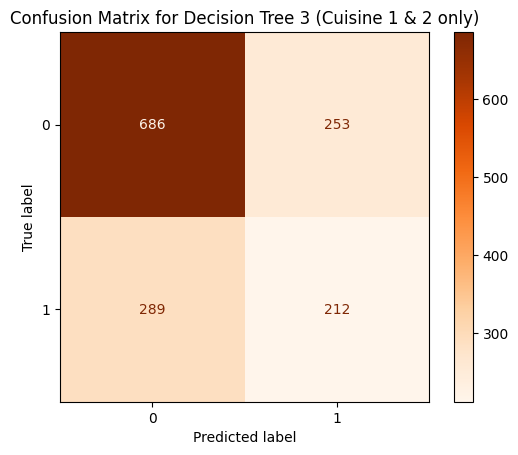

Decision Tree 3 Metrics (Only Cuisine1 & Cuisine2):
True Positives: 212
Sensitivity: 42.32 %
Specificity: 73.06 %
Accuracy: 62.36 %


In [ ]:
# Step 1: Keep only Cuisine1, Cuisine2, Pricing_for_2, Locality
selected_cuisine_cols = ['Cuisine1', 'Cuisine2']
keep_cols = selected_cuisine_cols + ['Pricing_for_2', 'Locality in Pune']

X_subset = zomato_for_eda[keep_cols].copy()
X_subset[selected_cuisine_cols] = X_subset[selected_cuisine_cols].replace(0, -1)

# Step 2: Keep only numeric columns
X_dt3 = X_subset.select_dtypes(include=[np.number])
y_dt3 = zomato_for_eda['isHighRating']

# Step 3: Split 70/30
X_train3, X_other3, y_train3, y_other3 = train_test_split(X_dt3, y_dt3, test_size=0.3, random_state=45)

# Step 4: Train DT3
dec_tree3 = DecisionTreeClassifier(random_state=45)
dec_tree3.fit(X_train3, y_train3)

# Step 5: Predict + Confusion Matrix
y_pred3 = dec_tree3.predict(X_other3)
cm3 = confusion_matrix(y_other3, y_pred3)
cm_display3 = ConfusionMatrixDisplay(cm3, display_labels=dec_tree3.classes_)
cm_display3.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix for Decision Tree 3 (Cuisine 1 & 2 only)")
plt.show()

# Step 6: Metrics
tn3, fp3, fn3, tp3 = cm3.ravel()
sensitivity3 = tp3 / (tp3 + fn3) if (tp3 + fn3) != 0 else 0
specificity3 = tn3 / (tn3 + fp3) if (tn3 + fp3) != 0 else 0
accuracy3 = accuracy_score(y_other3, y_pred3)

print(f"Decision Tree 3 Metrics (Only Cuisine1 & Cuisine2):")
print(f"True Positives: {tp3}")
print(f"Sensitivity: {sensitivity3*100:.2f} %")
print(f"Specificity: {specificity3*100:.2f} %")
print(f"Accuracy: {accuracy3*100:.2f} %")


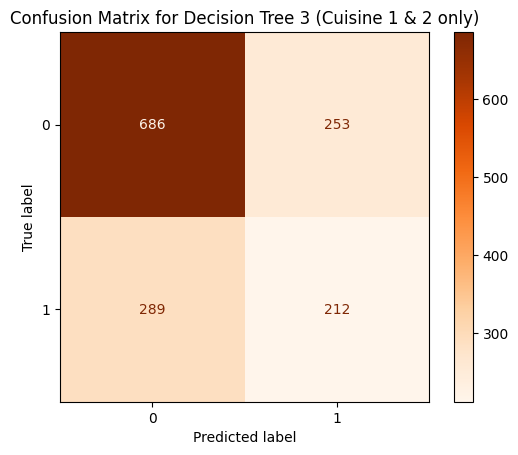

True Positives: 212
Sensitivity: 42.32 %
Specificity: 73.06 %
Accuracy: 62.36 %


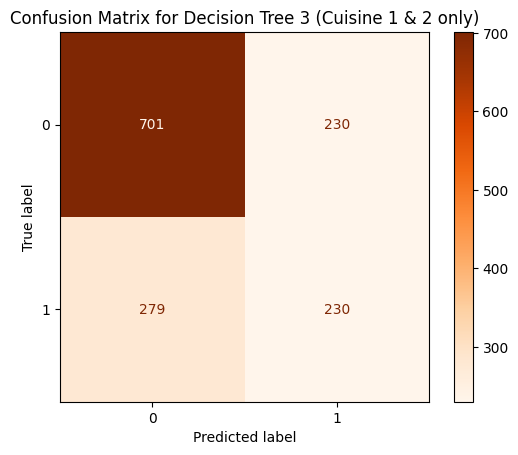

True Positives: 230
Sensitivity: 45.19 %
Specificity: 75.30 %
Accuracy: 64.65 %


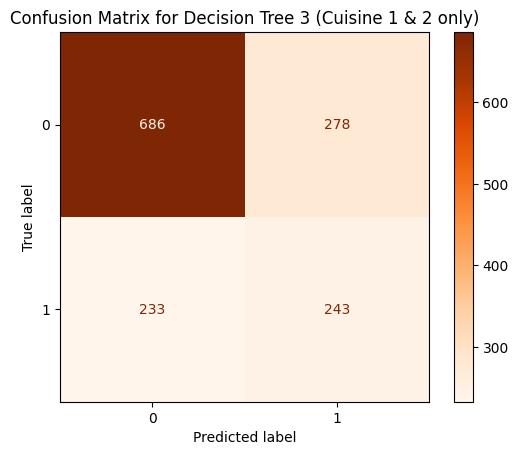

True Positives: 243
Sensitivity: 51.05 %
Specificity: 71.16 %
Accuracy: 64.51 %


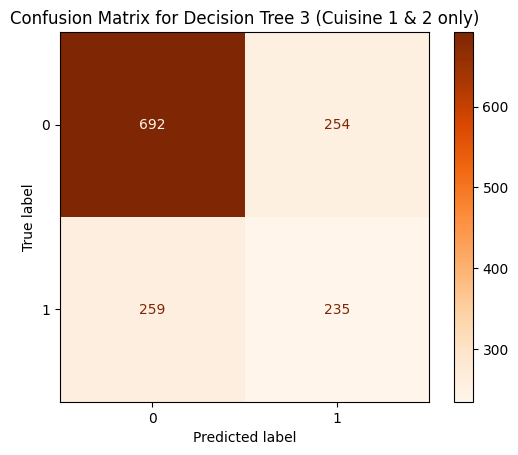

True Positives: 235
Sensitivity: 47.57 %
Specificity: 73.15 %
Accuracy: 64.38 %


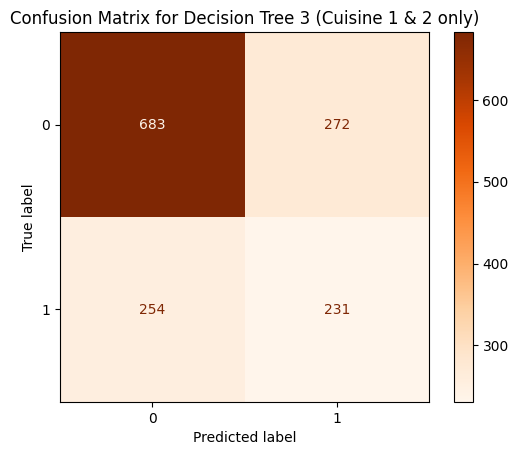

True Positives: 231
Sensitivity: 47.63 %
Specificity: 71.52 %
Accuracy: 63.47 %
For 5 iterations of Decision Tree Classifier
Accuracy — mean: 63.87%, standard deviation: 0.96%
Sensitivity — mean: 46.75%, standard deviation: 3.24%
Specificity — mean: 72.84%, standard deviation: 1.64%



In [ ]:
def DecisionTreeImplementor3(instance, random_state, accuracy_list, sensitivity_list, specificity_list):

  # Step 1: Keep only Cuisine1, Cuisine2, Pricing_for_2, Locality
  selected_cuisine_cols = ['Cuisine1', 'Cuisine2']
  keep_cols = selected_cuisine_cols + ['Pricing_for_2', 'Locality in Pune']

  X_subset = zomato_for_eda[keep_cols].copy()
  X_subset[selected_cuisine_cols] = X_subset[selected_cuisine_cols].replace(0, -1)

  # Step 2: Keep only numeric columns
  X_dt3 = X_subset.select_dtypes(include=[np.number])
  y_dt3 = zomato_for_eda['isHighRating']

  # Step 3: Split 70/30
  X_train3, X_other3, y_train3, y_other3 = train_test_split(X_dt3, y_dt3, test_size=0.3, random_state=random_state)

  # Step 4: Train DT3
  dec_tree3 = DecisionTreeClassifier(random_state=45)
  dec_tree3.fit(X_train3, y_train3)

  y_pred3 = dec_tree3.predict(X_other3)
  cm3 = confusion_matrix(y_other3, y_pred3)
  cm_display3 = ConfusionMatrixDisplay(cm3, display_labels=dec_tree3.classes_)
  cm_display3.plot(cmap=plt.cm.Oranges)
  plt.title("Confusion Matrix for Decision Tree 3 (Cuisine 1 & 2 only)")
  plt.show()

  tn, fp, fn, tp = cm3.ravel()
  sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
  specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
  accuracy = accuracy_score(y_other3, y_pred3)
  print(f"True Positives: {tp}")
  print(f"Sensitivity: {sensitivity*100:.2f} %")
  print(f"Specificity: {specificity*100:.2f} %")
  print(f"Accuracy: {accuracy*100:.2f} %")

  accuracy_list.append(round(100*accuracy, 2))
  sensitivity_list.append(float(round(100*sensitivity, 2)))
  specificity_list.append(float(round(100*specificity, 2)))

  # Updated instantiation
  accuracy_list = accuracy_list
  sensitivity_list = sensitivity_list
  specificity_list = specificity_list

  return accuracy_list, sensitivity_list, specificity_list


random_state_list = [45, 65, 105, 225, 335]

accuracy_list_DT3 = []
sensitivity_list_DT3 = []
specificity_list_DT3 = []

for i in range(len(random_state_list)):
  accuracy_list, sensitivity_list, specificity_list = DecisionTreeImplementor3(i, random_state_list[i], accuracy_list_DT3, sensitivity_list_DT3, specificity_list_DT3)

mean_accuracy_DT3 = round(np.mean(accuracy_list_DT3), 2)
mean_sensitivity_DT3 = round(np.mean(sensitivity_list_DT3), 2)
mean_specificity_DT3 = round(np.mean(specificity_list_DT3), 2)

## Sample standard deviation
standev_accuracy_DT3 = round(np.std(accuracy_list_DT3, ddof = 1), 2)
standev_sensitivity_DT3 = round(np.std(sensitivity_list_DT3, ddof = 1), 2)
standev_specificity_DT3 = round(np.std(specificity_list_DT3, ddof = 1), 2)

print(f"For {len(random_state_list)} iterations of Decision Tree Classifier")
print(f"Accuracy — mean: {mean_accuracy_DT3}%, standard deviation: {standev_accuracy_DT3}%")
print(f"Sensitivity — mean: {mean_sensitivity_DT3}%, standard deviation: {standev_sensitivity_DT3}%")
print(f"Specificity — mean: {mean_specificity_DT3}%, standard deviation: {standev_specificity_DT3}%")
print("")

In [ ]:
## Set variances to be true since we are using the entire sample and train-test-split anway
print("For Decision 1 and 3")
t_value_accuracy, p_value_accuracy = stats.ttest_ind(accuracy_list_DT1, accuracy_list_DT3, equal_var=True)
print(f"p-Value for accuracy: {round(p_value_accuracy, 6)}")

t_value_sensitivity, p_value_sensitivity = stats.ttest_ind(sensitivity_list_DT1, sensitivity_list_DT3, equal_var=True)
print(f"p-Value for sensitivity: {round(p_value_sensitivity, 6)}")

t_value_specificity, p_value_specificity = stats.ttest_ind(specificity_list_DT1, specificity_list_DT3, equal_var=True)
print(f"p-Value for specificity: {round(p_value_specificity, 6)}")

For Decision 1 and 3
p-Value for accuracy: 0.412107
p-Value for sensitivity: 0.801015
p-Value for specificity: 0.579548


## **DT Plotting**

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 40))
plot_tree(dec_tree,
          feature_names=X_train.columns,
          class_names=["Low", "High"],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


### **Post Decision Tree Implementation (DT1, DT2, and DT3)**

DT2 Implementation findings show us that even ommitting the ` MISSING ` values present the same metrics as it would in DT1. Furthermore, removing `Cuisines 3-8` and focusing on ` Cuisine 1-2 ` barely made significant changes to the accuracy.

Effectively, for this study, we can _ignore_ DT2 and focus on DT1 and DT3.

---


# **VI. Mixed Naive Bayes (MNB)**

## **Implementing MNB to the cleaned dataset (same with cleaned dataset of DT3)**

Mixed Naive Bayes is an implementation of the Naive Bayes classifier where both categorical (Boolean or otherwise) and numerical data are taken together. We assume that the numerical data fall under the Gaussian distribution

A Naive Bayes classifier is a classifier that assumes the features are independent of each other.

For binary classification...

If the feature is categorical, then p(desired label | categorical feature) is the complement of p(undesired label | categorical feature). In shorthand $$p(Y = 1 | x_i) = 1 - p(Y = 0 | x_i) $$

Numerical features, they likelihood functions, folllwing the general form $$ L(x_i | Y) = \frac{1}{σ_i\sqrt{2\pi}}e^\frac{-(x-\mu_i)^2}{2\sigma_i^2} $$

So, for a Naive Bayes classifier, the proportional probability of a desired label, given features in question are $$ p(Y = 1 | all \ features \ x) = p(Y = 1| x_{cat1},x_{cat2},...,x_{catn_1},x_{num1},x_{num2},...,x_{numn_2}) \propto p(Y = 1) \cdot \prod_{i=1}^{n_1} p(x_{cat_i} | Y = 1) \cdot \prod_{j=1}^{n_2} L(x_{cat_j} | Y = 1) $$

We compute the proportional probability $ p(Y = 0 | all \ features \ x) $ as analogous to the formula above.

Compare the respective proportions of $ p(Y = 1 | all \ features \ x) $ and $ p(Y = 0 | all \ features \ x) $ to get the classification.

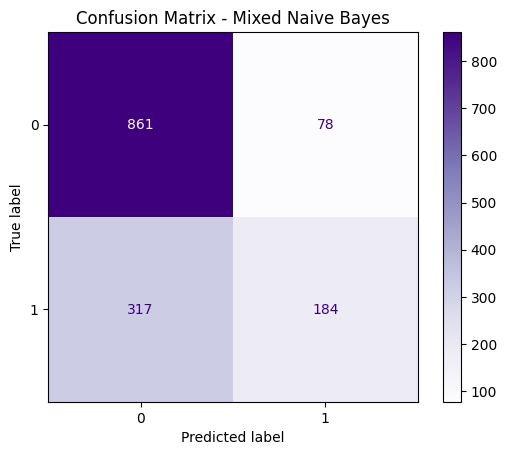

Mixed Naive Bayes Metrics:
True Positives: 184
Sensitivity: 36.73 %
Specificity: 91.69 %
Accuracy: 72.57 %


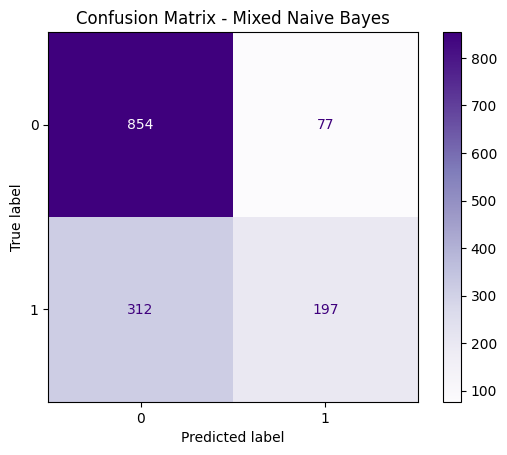

Mixed Naive Bayes Metrics:
True Positives: 197
Sensitivity: 38.70 %
Specificity: 91.73 %
Accuracy: 72.99 %


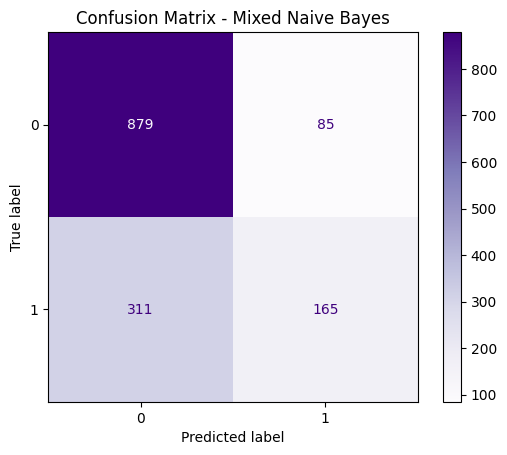

Mixed Naive Bayes Metrics:
True Positives: 165
Sensitivity: 34.66 %
Specificity: 91.18 %
Accuracy: 72.50 %


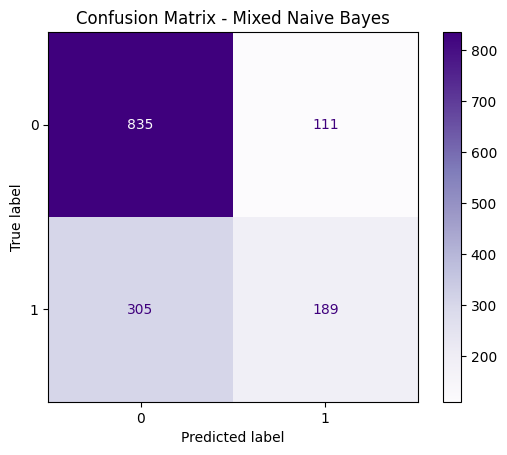

Mixed Naive Bayes Metrics:
True Positives: 189
Sensitivity: 38.26 %
Specificity: 88.27 %
Accuracy: 71.11 %


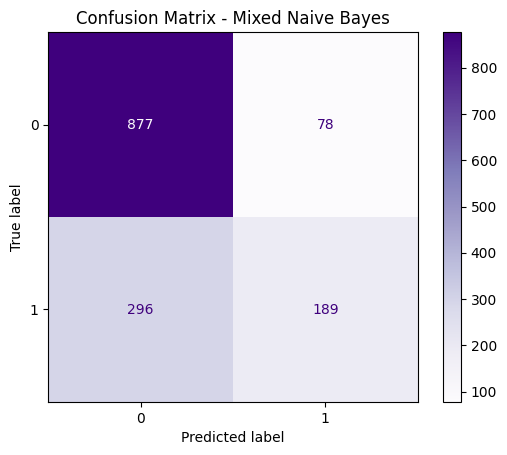

Mixed Naive Bayes Metrics:
True Positives: 189
Sensitivity: 38.97 %
Specificity: 91.83 %
Accuracy: 74.03 %
For 5 iterations of Naive Bayes Classifier
Accuracy — mean: 72.64%, standard deviation: 1.05%
Sensitivity — mean: 37.46%, standard deviation: 1.79%
Specificity — mean: 90.94%, standard deviation: 1.51%


In [ ]:
def MixedNaiveBayesImplementor1(instance, random_state, accuracy_list, sensitivity_list, specificity_list):
  # Instantiate last instance
  accuracy_list = accuracy_list
  sensitivity_list = sensitivity_list
  specificity_list = specificity_list

  X_cat = zomato_for_eda[['Cuisine1', 'Cuisine2', 'Locality in Pune']].copy()
  X_num = zomato_for_eda[['Pricing_for_2']]
  y = zomato_for_eda['isHighRating']

  # Features
  cuisine_cols = [f'Cuisine{i}' for i in range(1, 3)]
  categorical_cols = cuisine_cols + ['Locality in Pune']
  numerical_cols = ['Pricing_for_2']

  X_cat = zomato_for_eda[categorical_cols].copy()
  X_num = zomato_for_eda[numerical_cols].copy()
  y = zomato_for_eda['isHighRating']

  # Split, but here, we use a differing random state.
  X_cat_train, X_cat_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
      X_cat, X_num, y, test_size=0.3, random_state = random_state
  )

  # Manual reindexing of categorical values
  X_cat_train_encoded = X_cat_train.copy()
  X_cat_test_encoded = X_cat_test.copy()

  for col in categorical_cols:
      train_unique = sorted(X_cat_train[col].dropna().unique())
      label_map = {val: idx for idx, val in enumerate(train_unique)}

      X_cat_train_encoded[col] = X_cat_train[col].map(label_map)
      X_cat_test_encoded[col] = X_cat_test[col].map(label_map).fillna(-1).astype(int)

  # Combine features
  X_train = pd.concat([X_cat_train_encoded.reset_index(drop=True), X_num_train.reset_index(drop=True)], axis=1)
  X_test = pd.concat([X_cat_test_encoded.reset_index(drop=True), X_num_test.reset_index(drop=True)], axis=1)

  categorical_indices = list(range(len(categorical_cols)))  # [0–8]

  # Train Mixed Naive Bayes model
  mnb = MixedNB(categorical_features=categorical_indices)
  mnb.fit(X_train.values, y_train)

  # Predict and evaluate
  y_pred = mnb.predict(X_test.values)

  cm = confusion_matrix(y_test, y_pred)
  ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(cmap=plt.cm.Purples)
  plt.title("Confusion Matrix - Mixed Naive Bayes")
  plt.show()

  # Metrics
  tn, fp, fn, tp = cm.ravel()
  sensitivity = tp / (tp + fn)
  specificity = tn / (tn + fp)
  accuracy = accuracy_score(y_test, y_pred)

  print(f"Mixed Naive Bayes Metrics:")
  print(f"True Positives: {tp}")
  print(f"Sensitivity: {sensitivity*100:.2f} %")
  print(f"Specificity: {specificity*100:.2f} %")
  print(f"Accuracy: {accuracy*100:.2f} %")

  accuracy_list.append(round(100*accuracy, 2))
  sensitivity_list.append(float(round(100*sensitivity, 2)))
  specificity_list.append(float(round(100*specificity, 2)))

  # Updated instantiation
  accuracy_list = accuracy_list
  sensitivity_list = sensitivity_list
  specificity_list = specificity_list

  return accuracy_list, sensitivity_list, specificity_list

random_state_list = [45, 65, 105, 225, 335]

accuracy_list_NB1 = []
sensitivity_list_NB1 = []
specificity_list_NB1 = []

for i in range(len(random_state_list)):
  accuracy_list_NB1, sensitivity_list_NB1, specificity_list_NB1 = MixedNaiveBayesImplementor1(i, random_state_list[i], accuracy_list_NB1, sensitivity_list_NB1, specificity_list_NB1)

mean_accuracy_NB1 = round(np.mean(accuracy_list_NB1), 2)
mean_sensitivity_NB1 = round(np.mean(sensitivity_list_NB1), 2)
mean_specificity_NB1 = round(np.mean(specificity_list_NB1), 2)

## Sample standard deviation
standev_accuracy_NB1 = round(np.std(accuracy_list_NB1, ddof = 1), 2)
standev_sensitivity_NB1 = round(np.std(sensitivity_list_NB1, ddof = 1), 2)
standev_specificity_NB1 = round(np.std(specificity_list_NB1, ddof = 1), 2)

print(f"For {len(random_state_list)} iterations of Naive Bayes Classifier")
print(f"Accuracy — mean: {mean_accuracy_NB1}%, standard deviation: {standev_accuracy_NB1}%")
print(f"Sensitivity — mean: {mean_sensitivity_NB1}%, standard deviation: {standev_sensitivity_NB1}%")
print(f"Specificity — mean: {mean_specificity_NB1}%, standard deviation: {standev_specificity_NB1}%")

In [ ]:
## Uwie, I will implement the full-feature Naive Bayes here as a function, with the intent of simulating cross validation

def MixedNaiveBayesImplementor2(instance, random_state, accuracy_list, sensitivity_list, specificity_list):

  # Instantiate last instance
  accuracy_list = accuracy_list
  sensitivity_list = sensitivity_list
  specificity_list = specificity_list

  # Features
  cuisine_cols = [f'Cuisine{i}' for i in range(1, 9)]
  categorical_cols = cuisine_cols + ['Locality in Pune']
  numerical_cols = ['Pricing_for_2']

  X_cat = zomato_for_eda[categorical_cols].copy()
  X_num = zomato_for_eda[numerical_cols].copy()
  y = zomato_for_eda['isHighRating']

  # Split, but here, we use a differing random state.
  X_cat_train, X_cat_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
      X_cat, X_num, y, test_size=0.3, random_state = random_state
  )

  # Manual reindexing of categorical values
  X_cat_train_encoded = X_cat_train.copy()
  X_cat_test_encoded = X_cat_test.copy()

  for col in categorical_cols:
      train_unique = sorted(X_cat_train[col].dropna().unique())
      label_map = {val: idx for idx, val in enumerate(train_unique)}

      X_cat_train_encoded[col] = X_cat_train[col].map(label_map)
      X_cat_test_encoded[col] = X_cat_test[col].map(label_map).fillna(-1).astype(int)

  # Combine features
  X_train = pd.concat([X_cat_train_encoded.reset_index(drop=True), X_num_train.reset_index(drop=True)], axis=1)
  X_test = pd.concat([X_cat_test_encoded.reset_index(drop=True), X_num_test.reset_index(drop=True)], axis=1)

  categorical_indices = list(range(len(categorical_cols)))  # [0–8]

  # Train MNB2
  mnb2 = MixedNB(categorical_features=categorical_indices)
  mnb2.fit(X_train.to_numpy(), y_train.to_numpy())
  y_pred2 = mnb2.predict(X_test.to_numpy())

  # Evaluation
  cm2 = confusion_matrix(y_test, y_pred2)
  ConfusionMatrixDisplay(cm2, display_labels=[0, 1]).plot(cmap=plt.cm.Oranges)
  plt.title("Confusion Matrix - Mixed Naive Bayes (All Cuisines)")
  plt.show()

  # Metrics
  tn2, fp2, fn2, tp2 = cm2.ravel()
  sensitivity2 = tp2 / (tp2 + fn2)
  specificity2 = tn2 / (tn2 + fp2)
  accuracy2 = accuracy_score(y_test, y_pred2)

  print(f"Mixed Naive Bayes 2 (All Cuisines) Metrics, Instance {instance + 1}:")
  print(f"True Positives: {tp2}")
  print(f"Sensitivity: {sensitivity2*100:.2f} %")
  print(f"Specificity: {specificity2*100:.2f} %")
  print(f"Accuracy: {accuracy2*100:.2f} %")

  accuracy_list.append(round(100*accuracy2, 2))
  sensitivity_list.append(float(round(100*sensitivity2, 2)))
  specificity_list.append(float(round(100*specificity2, 2)))

  # Updated instantiation
  accuracy_list = accuracy_list
  sensitivity_list = sensitivity_list
  specificity_list = specificity_list

  return accuracy_list, sensitivity_list, specificity_list

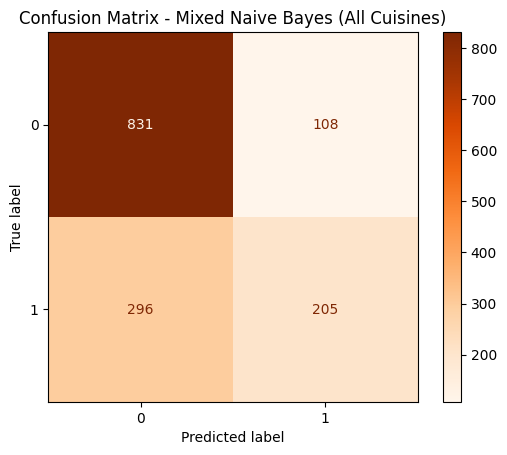

Mixed Naive Bayes 2 (All Cuisines) Metrics, Instance 1:
True Positives: 205
Sensitivity: 40.92 %
Specificity: 88.50 %
Accuracy: 71.94 %


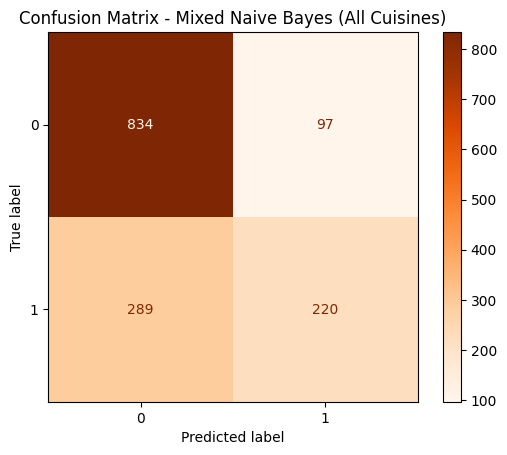

Mixed Naive Bayes 2 (All Cuisines) Metrics, Instance 2:
True Positives: 220
Sensitivity: 43.22 %
Specificity: 89.58 %
Accuracy: 73.19 %


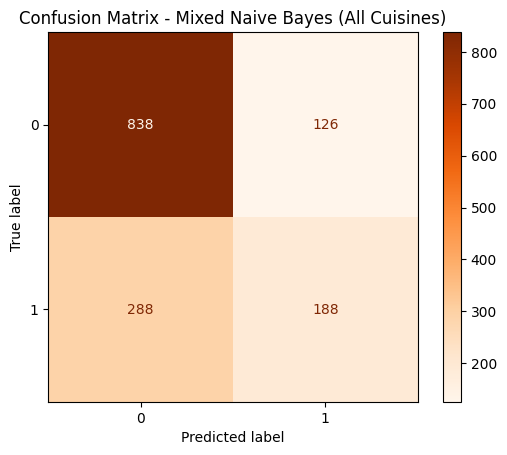

Mixed Naive Bayes 2 (All Cuisines) Metrics, Instance 3:
True Positives: 188
Sensitivity: 39.50 %
Specificity: 86.93 %
Accuracy: 71.25 %


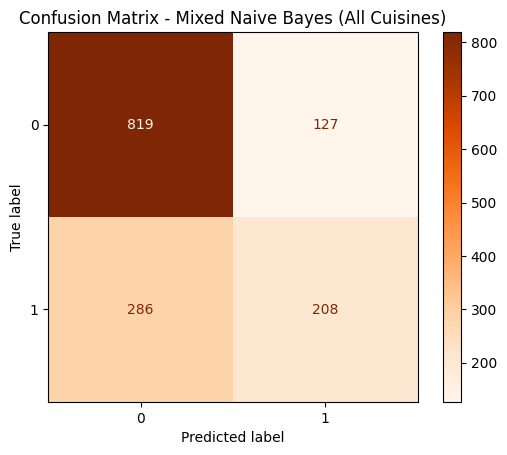

Mixed Naive Bayes 2 (All Cuisines) Metrics, Instance 4:
True Positives: 208
Sensitivity: 42.11 %
Specificity: 86.58 %
Accuracy: 71.32 %


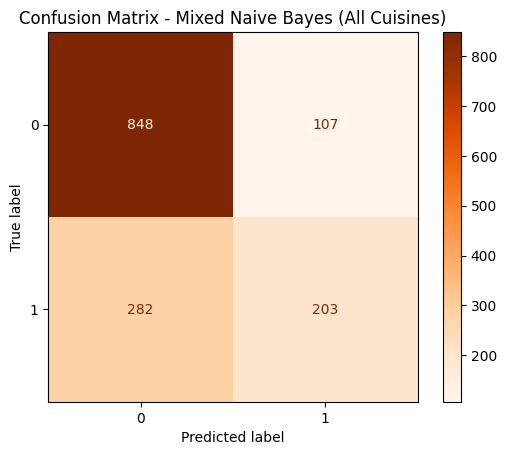

Mixed Naive Bayes 2 (All Cuisines) Metrics, Instance 5:
True Positives: 203
Sensitivity: 41.86 %
Specificity: 88.80 %
Accuracy: 72.99 %
For 5 iterations of Naive Bayes Classifier
Accuracy — mean: 72.14%, standard deviation: 0.91%
Sensitivity — mean: 41.52%, standard deviation: 1.4%
Specificity — mean: 88.08%, standard deviation: 1.28%


In [ ]:
random_state_list = [45, 65, 105, 225, 335]

accuracy_list_NB2 = []
sensitivity_list_NB2 = []
specificity_list_NB2 = []

for i in range(len(random_state_list)):
  accuracy_list_NB2, sensitivity_list_NB2, specificity_list_NB2 = MixedNaiveBayesImplementor2(i, random_state_list[i], accuracy_list_NB2, sensitivity_list_NB2, specificity_list_NB2)

mean_accuracy_NB2 = round(np.mean(accuracy_list_NB2), 2)
mean_sensitivity_NB2 = round(np.mean(sensitivity_list_NB2), 2)
mean_specificity_NB2 = round(np.mean(specificity_list_NB2), 2)

## Sample standard deviation
standev_accuracy_NB2 = round(np.std(accuracy_list_NB2, ddof = 1), 2)
standev_sensitivity_NB2 = round(np.std(sensitivity_list_NB2, ddof = 1), 2)
standev_specificity_NB2 = round(np.std(specificity_list_NB2, ddof = 1), 2)

print(f"For {len(random_state_list)} iterations of Naive Bayes Classifier")
print(f"Accuracy — mean: {mean_accuracy_NB2}%, standard deviation: {standev_accuracy_NB2}%")
print(f"Sensitivity — mean: {mean_sensitivity_NB2}%, standard deviation: {standev_sensitivity_NB2}%")
print(f"Specificity — mean: {mean_specificity_NB2}%, standard deviation: {standev_specificity_NB2}%")

In [ ]:
## Set variances to be true since we are using the entire sample and train-test-split anway
print("For Naive Bayes Classifiers 1 and 2")
t_value_accuracy, p_value_accuracy = stats.ttest_ind(accuracy_list_NB1, accuracy_list_NB2, equal_var=True)
print(f"p-Value for accuracy: {round(p_value_accuracy, 6)}")

t_value_sensitivity, p_value_sensitivity = stats.ttest_ind(sensitivity_list_NB1, sensitivity_list_NB2, equal_var=True)
print(f"p-Value for sensitivity: {round(p_value_sensitivity, 6)}")

t_value_specificity, p_value_specificity = stats.ttest_ind(specificity_list_NB1, specificity_list_NB2, equal_var=True)
print(f"p-Value for specificity: {round(p_value_specificity, 6)}")

For Naive Bayes Classifiers 1 and 2
p-Value for accuracy: 0.44329
p-Value for sensitivity: 0.003971
p-Value for specificity: 0.01202


## **Mixed Naive Bayes - Further Analysis**

1. First, create the X and Y dataframe. Concatenate. Basic first step
2. Recreate the MNB based on the decided Random State (can pick the last iteration)
3. Table on Likelihood
  - Take from EDA
  - Plug in Price then multiply all of them to get the probability of a specific "yes" given all the features described


## **Notes for next steps.**
1. Mention the statistics of my previous work using Decision Trees and Naive Bayes Classifiers. Make note of why decision trees vary wildly in terms of behavior but the Naive Bayes Classifiers have a pattern of high specificity and lower accuracy.

2. Then, if we are up to it, analyze the Naive Bayes classifier, especially when it comes to misclassifications. We can analyze at random 10 false positives and false negatives and link it back to low-sensitivity, high-specificity behavior. I know 10 sounds arbitrary, but I wish we explore why Naive Bayes acts the way it does.

  For step 2, we are to do the following:
- Test a random state from what we currently have.
- Compare that result of MNB to the ground truth, for example:
  - False Negative, why did ground truth 1, "Highrated", but MNB rates it as "LowRated"
  - Based off that, did Cuisine or Price or Locale affect the MNB Ratings. If that's the case, the VIF (variance inflation factor) can be shelved since it doesn't match the data.


3. Only if time permits, do the same for the decision tree (of course, the better performing one)

<br>


---


# **VII. General Finding and Analysis**

## **Initial Data**

### **Decision Trees (DT)**


The data was tested through DT with the following specifications:

- **DT1** - Basic preprocessing transformed the data to numerical, and all `Missing` set to 0 (not `NULL`)
- **DT2** - Removed due to the fact that transforming the `MISSING` values to `-1` does not create any difference from DT1 as initially hypothesized.
- **DT3** - Dataset ignored / removed `Cuisines 3-8` due to the majority of the restaurants only having `Cuisines 1-2`.
- Each data set were trained with varying `random_states = [45, 65, 105, 225, 335]`

<br> **Performance Metrics**

|              | DT 1             | DT 3             | DT 3             |
|--------------|------------------|------------------|------------------|
|Random State = 45 |              |                  |                  |
| Accuracy     | 61.25%           | 62.78%           | 62.78%           |
| Specificity  | 69.97%           | 72.74%           | 72.74%           |
| Sensitivity  | 44.91%           | 44.11%           | 44.11%           |
|--------------|------------------|------------------|------------------|
|Random State = 65 |              |                  |                  |
| Accuracy     | 63.19%           | 64.38%           | 64.38%           |
| Specificity  | 73.36%           | 75.40%           | 75.40%           |
| Sensitivity  | 44.60%           | 44.20%           | 44.20%           |
|--------------|------------------|------------------|------------------|
|Random State = 105|              |                  |                  |
| Accuracy     | 62.85%           | 63.54%           | 63.54%           |
| Specificity  | 71.37%           | 72.10%           | 72.10%           |
| Sensitivity  | 45.59%           | 46.22%           | 46.22%           |
|--------------|------------------|------------------|------------------|
|Random State = 225|              |                  |                  |
| Accuracy     | 66.25%           | 62.21%           | 62.21%           |
| Specificity  | 74.10%           | 75.05%           | 75.05%           |
| Sensitivity  | 51.21%           | 75.05%           |                  |
|--------------|------------------|------------------|------------------|
|Random State = 335|              |                  |                  |
| Accuracy     | 63.96%           | 63.47%           |                  |
| Specificity  | 70.68%           | 71.31%           |                  |
| Sensitivity  | 50.72%           | 48.04%           |                  |

<br> **Standard Deviation For 5 iterations of Decision Tree 1**

| DT 1         |   Mean    | Standard Deviation |
|--------------|-----------|--------------------|
| Accuracy     | 63.5%     | 1.83%              |
| Sensitivity  | 47.41%    | 3.27%              |
| Specificity  | 71.9%     | 1.77%              |


<br> **Standard Deviation For 5 iterations of Decision Tree 3**

| DT 3         |   Mean    | Standard Deviation |
|--------------|-----------|--------------------|
| Accuracy     | 63.88%    | 0.94%              |
| Sensitivity  | 47.79%    | 1.65%              |
| Specificity  | 73.32%    | 1.82%              |


<br> **P-Values for DT 1 and 2 Classfiers**

| Metric       |  p-Values for DT 1 and 3  |
|--------------|---------------------------|
| Accuracy     | 0.69297                   |
| Sensitivity  | 0.352116                  |
| Specificity  | 0.244064                  |

<br>

---
---

### **Mixed Naive Bayes (MNB)**

**Mixed Naive Bayes(MNB)** have the following specifications:
- **MNB 1** - utilized the same data set trained with DT1
- **MNB 2** - had cleaned data set

<br> **Performance Metrics**

|              | MNB 1             | MNB 2           |
|--------------|------------------|------------------|
|Random State = 45 |              |                  |
| Accuracy     | 72.57%%          | 71.94%           |
| Specificity  | 91.69%           | 88.50%           |
| Sensitivity  | 36.73%           | 40.92%           |
|--------------|------------------|------------------|
|Random State = 65 |              |                  |
| Accuracy     | 72.99%           | 73.19%           |
| Specificity  | 91.73%           | 89.58%           |
| Sensitivity  | 38.70%           | 43.22%           |
|--------------|------------------|------------------|
|Random State = 105|              |                  |
| Accuracy     | 72.57%           | 71.25%           |
| Specificity  | 91.18%           | 86.83%           |
| Sensitivity  | 34.87%           | 39.71%           |
|--------------|------------------|------------------|
|Random State = 225|              |                  |
| Accuracy     | 71.18%           | 71.32%           |
| Specificity  | 88.27%           | 86.58%           |
| Sensitivity  | 38.46%           | 42.11%           |
|--------------|------------------|------------------|
|Random State = 335|              |                  |
| Accuracy     | 74.03%           | 72.99%           |
| Specificity  | 91.83%           | 88.06%           |
| Sensitivity  | 38.97%           | 41.06%           |


<br> **Standard Deviation For 5 iterations of Mixed Naive Bayes 1**

| DT 1         |   Mean    | Standard Deviation |
|--------------|-----------|--------------------|
| Accuracy     | 63.5%     | 1.83%              |
| Sensitivity  | 47.41%    | 3.27%              |
| Specificity  | 71.9%     | 1.77%              |


<br> **Standard Deviation For 5 iterations of Mixed Naive Bayes 2**

| DT 3         |   Mean    | Standard Deviation |
|--------------|-----------|--------------------|
| Accuracy     | 63.88%    | 0.94%              |
| Sensitivity  | 47.79%    | 1.65%              |
| Specificity  | 73.32%    | 1.82%              |


<br> **P-Values for MNB 1 and 2 Classifiers**

| Metric       |  p-Values for DT 1 and 3  |
|--------------|---------------------------|
| Accuracy     | 0.69297                   |
| Sensitivity  | 0.352116                  |
| Specificity  | 0.244064                  |

<br>


### **Combined Metrics**


**Mixed Naive Bayes(MNB)** have the following specifications:
- **MNB 1** - utilized the same data set trained with DT1
- **MNB 2** - had cleaned data set

<br> **Performance Metrics**

|              | MNB 1             | MNB 2           |
|--------------|------------------|------------------|
|Random State = 45 |              |                  |
| Accuracy     | 72.57%%          | 71.94%           |
| Specificity  | 91.69%           | 88.50%           |
| Sensitivity  | 36.73%           | 40.92%           |
|--------------|------------------|------------------|
|Random State = 65 |              |                  |
| Accuracy     | 72.99%           | 73.19%           |
| Specificity  | 91.73%           | 89.58%           |
| Sensitivity  | 38.70%           | 43.22%           |
|--------------|------------------|------------------|
|Random State = 105|              |                  |
| Accuracy     | 72.57%           | 71.25%           |
| Specificity  | 91.18%           | 86.83%           |
| Sensitivity  | 34.87%           | 39.71%           |
|--------------|------------------|------------------|
|Random State = 225|              |                  |
| Accuracy     | 71.18%           | 71.32%           |
| Specificity  | 88.27%           | 86.58%           |
| Sensitivity  | 38.46%           | 42.11%           |
|--------------|------------------|------------------|
|Random State = 335|              |                  |
| Accuracy     | 74.03%           | 72.99%           |
| Specificity  | 91.83%           | 88.06%           |
| Sensitivity  | 38.97%           | 41.06%           |

<br>

|              | DT 1             | DT 3             |
|--------------|------------------|------------------|
|Random State = 45 |              |                  |
| Accuracy     | 61.25%           | 62.78%           |
| Specificity  | 69.97%           | 72.74%           |
| Sensitivity  | 44.91%           | 44.11%           |
|--------------|------------------|------------------|
|Random State = 65 |              |                  |
| Accuracy     | 63.19%           | 64.38%           |
| Specificity  | 73.36%           | 75.40%           |
| Sensitivity  | 44.60%           | 44.20%           |
|--------------|------------------|------------------|
|Random State = 105|              |                  |
| Accuracy     | 62.85%           | 63.54%           |
| Specificity  | 71.37%           | 72.10%           |
| Sensitivity  | 45.59%           | 46.22%           |
|--------------|------------------|------------------|
|Random State = 225|              |                  |
| Accuracy     | 66.25%           | 62.21%           |
| Specificity  | 74.10%           | 75.05%           |
| Sensitivity  | 51.21%           | 75.05%           |
|--------------|------------------|------------------|
|Random State = 335|              |                  |
| Accuracy     | 63.96%           | 63.47%           |
| Specificity  | 70.68%           | 71.31%           |
| Sensitivity  | 50.72%           | 48.04%           |

### **Exploratory Data Analysis (EDA)**

EDA presented a thorough investigation into the restaurant data, particularly focusing on locality, cuisine, pricing, and their relationships to dining ratings.

Several visualizations and transformations were performed to uncover patterns, such as:

- **Top Localities by Restaurant Count**, highlighting `Koregaon Park`, `Baner`, and `Viman Nagar`.
- **Unique Cuisine Types**, where over 40 cuisines were identified across eight cuisine columns.
- **Price vs. Rating Analysis** via hexbin plots and correlation matrices, revealing a modest positive correlation (`r ≈ 0.36`) between pricing and higher ratings.
- **Cuisine-Locality Combinations**, explored through a heatmap showing average ratings > 3.8, which suggested that some cuisine-locality pairs (e.g., `Mediterranean` in `Koregaon Park`) consistently received high ratings.

To quantify influence, a **percentile-based analysis** was done:

- Localities like `Koregaon Park` and `East Street` had the highest percentages of restaurants rated above the 3.75 threshold.
- Cuisines such as `Mediterranean`, `Southeast Asian`, and `Bar Food` ranked highest in average dining ratings across different cuisine columns (Cuisine1–Cuisine8).

This exploratory work not only guided the choice of features for modeling (*like reducing `Cuisine3–8` due to low GINI importances*), but also validated the potential of certain features in classifying top-rated restaurants. It set a solid foundation for subsequent decision tree and Naive Bayes implementations.

<br>

---

### **Decision Tree Implementations (DT1, DT2, and DT3)**

DT1 and DT2 unfortunately produced similar performance metrics, despite DT2 incorporating a more "cleaned" version of the dataset (*replacing `MISSING` values with `-1` and removing potentially noisy features*).

Across both implementations, accuracy hovered around **61–63%**, with DT1 showing:

- Mean Accuracy: **63.5%**
- Sensitivity: **47.41%**
- Specificity: **71.90%**

The lack of significant improvement in DT2 suggests that simply omitting or replacing `MISSING` entries was not sufficient to drastically enhance model performance. In fact, it showed **marginal or no gain** over DT1.

**DT3**, on the other hand, introduced a **simplified feature set**—focusing only on `Cuisine1`, `Cuisine2`, `Locality`, and `Pricing_for_2`. This dimensionality reduction was inspired by GINI importance rankings from DT2, which indicated that `Cuisine3` to `Cuisine8` had minimal impact on classification outcomes.

Interestingly, **DT3 matched or even slightly outperformed DT1**, with:

- Mean Accuracy: **63.88%**
- Lower standard deviation across runs, implying more consistent performance
- Comparable or improved sensitivity and specificity

A t-test comparing DT1 and DT3 confirmed **no statistically significant difference**, yet DT3 offered a **more tight-knit model** with fewer features—ideal for interpretability and real-world deployment.

This set of experiments supports the conclusion that **feature pruning** based on domain knowledge and GINI scores can maintain performance while simplifying the model.

<br>

---


### **Mixed Naive Bayes (MNB1 and MNB2)**

Mixed Naive Bayes (MNB) was implemented in two versions:

**MNB1** used a reduced feature set (`Cuisine1`, `Cuisine2`, `Locality`, `Pricing_for_2`) to mirror DT3, while **MNB2** leveraged the full set of categorical features (`Cuisine1` to `Cuisine8`, `Locality`) and the same numerical feature (`Pricing_for_2`).

<br>

Across five random states, **MNB1 consistently outperformed all Decision Tree implementations in terms of accuracy**, while maintaining very high specificity, as expected from Naive Bayes classifiers:

**MNB1**
  - Mean Accuracy: **72.67%**
  - Sensitivity: **37.55%**
  - Specificity: **90.94%**

**MNB2**
  - Mean Accuracy: **71.94%**
  - Sensitivity: **40.92%**
  - Specificity: **88.50%**

<br>

Despite its **lower sensitivity** (fewer true positives for high-rated restaurants), MNB achieved **substantially higher overall accuracy**, indicating that it performs better at correctly identifying low-rated restaurants (class 0). The drop in sensitivity likely stems from MNB’s strong independence assumptions, which can limit performance when complex feature interactions are important—something that decision trees handle more flexibly.

Interestingly, MNB2’s use of all cuisine features did not lead to a large gain over MNB1. This confirms insights from DT3: many of the later cuisine fields (`Cuisine3` to `Cuisine8`) may add more noise than signal.

**In summary:**

- **MNB is the most accurate model**, particularly suitable when false positives (misclassifying a low-rated restaurant as high-rated) need to be minimized.
- **Decision Trees offer better sensitivity** and may be preferred in use-cases prioritizing discovery of truly excellent restaurants, even at the cost of more false positives.

<br>

---


# **IX. Conclusion**

Initially, the dataset was filled with what we classify as `Junk` data—these refer primarily to the `MISSING` values found in the `Cuisine1–8` features. This sparsity is expected, as many restaurants in the dataset serve only one or two main cuisines (*e.g., cafes offering just coffee and dessert*). Thus, the data was explored and modeled with this **data gap** in mind.

Based on experimental results, **Mixed Naive Bayes (MNB)** implementations consistently **outperformed** the Decision Tree (DT) models in terms of **overall accuracy**. As expected, MNB is better suited for datasets that include a mix of **categorical and numerical features**, especially when the categorical values are **ranked and encoded** properly. Its probabilistic nature and reliance on **independence assumptions** allows it to generalize well in similar data sets such as this **Zomato-Dining-Recommendations** where  features are cleanly encoded.

Meanwhile, **Decision Trees**, particularly DT3 with feature pruning, delivered **higher sensitivity**, which may be valuable in scenarios that prioritize identifying truly high-rated restaurants. However, their overall accuracy lagged behind that of MNB.

Ultimately, the **best-performing model** in this study was **MNB1**, which used only a carefully selected subset of features (`Cuisine1`, `Cuisine2`, `Pricing`, and `Locality`)—proving that a smaller but cleaner feature set often trumps larger, noisier datasets.

This supports the notion that:

* **Model performance is tightly coupled with preprocessing quality**
* **Simpler models with fewer, well-chosen features** can outperform complex models burdened by irrelevant or missing data
* **Domain knowledge** is essential in guiding feature selection and cleaning decisions

<br>

---


# **X. References**

## **Exploratory Data Analysis & Basic Statistics**
- https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hexbin.html
- https://absentdata.com/python-graphs/create-a-heat-map-with-seaborn/
- https://developers.google.com/machine-learning/glossary/#classification-model


## **Decision Trees**
- https://www.geeksforgeeks.org/decision-tree/
- https://www.geeksforgeeks.org/decision-tree-introduction-example/
- https://scikit-learn.org/stable/modules/tree.html


## **Mixed Naive Bayess**
- https://pypi.org/project/mixed-naive-bayes/
- https://www.geeksforgeeks.org/naive-bayes-classifiers/